In [557]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import butter, filtfilt, find_peaks
import json
import scipy.stats
from datetime import datetime

In [558]:
pillow_data_path = r"PillowData.csv"
daily_activity_path = r"Daily activity metrics (2023-11-01).csv"

df_sleep = pd.read_csv(pillow_data_path)
df_activity = pd.read_csv(daily_activity_path)

In [559]:
df_sleep.head(14);

In [560]:
column_names = df_sleep.columns;
column_names;

In [561]:
import pandas as pd

data = pd.read_csv(pillow_data_path)
df_sleep = pd.DataFrame(data)

df_sleep["Start Time"] = df_sleep["Start Time"].str.replace(r'\s+', '', regex=True)
df_sleep[" End Time"] = df_sleep[" End Time"].str.replace(r'\s+', '', regex=True)
df_sleep["Start Time"] = df_sleep["Start Time"].str.replace(r'Optional\(', '', regex=True).str.replace(r'\)', '', regex=True)
df_sleep[" End Time"] = df_sleep[" End Time"].str.replace(r'Optional\(', '', regex=True).str.replace(r'\)', '', regex=True)


df_sleep["Start Time"] = pd.to_datetime(df_sleep["Start Time"], format='%Y-%m-%d%H:%M:%S%z'
)
df_sleep[" End Time"] = pd.to_datetime(df_sleep[" End Time"], format='%Y-%m-%d%H:%M:%S%z'
)

df_sleep;

In [562]:
df_sleep[' End Time'] = df_sleep[' End Time'].apply(lambda x: pd.to_datetime(x, unit='ns'))
df_sleep['Start Time'] = df_sleep['Start Time'].apply(lambda x: pd.to_datetime(x, unit='ns'))
df_sleep['Duration'] = df_sleep[' End Time'] - df_sleep['Start Time']
df_sleep

result = df_sleep.groupby(
    (
        (
            df_sleep['Start Time'] - df_sleep[' End Time'].shift(1)
        ) > pd.Timedelta(1, unit='minute')
    ).cumsum()
).agg({'Start Time': 'min', ' End Time': 'max', 'Duration': 'sum'})
df_sleep['Duration']=result['Duration']
df_sleep;

<h2 style="color: Yellow;">SLEEP DATA
<h4 style="color: Yellow;">This data frame provides daily sleep data, including the client's time spent in bed and a sleep quality percentage determined by the Pillow application's standards, which take into account awake time, REM (Rapid Eye Movement) sleep duration, light sleep duration, and deep sleep duration.
<h4 style="color: Yellow;">It is important to note that certain dates are missing from the data due to outliers, which may distort the data's accuracy and representation.

In [563]:
df_sleep['Start Time'] = pd.to_datetime(df_sleep['Start Time'])
df_sleep[' End Time'] = pd.to_datetime(df_sleep[' End Time'])

df_sleep['Start Time'] = df_sleep['Start Time'] - pd.Timedelta(days=1)
df_sleep[' End Time'] = df_sleep[' End Time'] - pd.Timedelta(days=1)
df_sleep['Date'] = df_sleep[' End Time'].dt.strftime('%Y-%m-%d')

new_df = df_sleep[['Date', ' Time in Bed (mins)', ' Sleep quality', ' Awake duration (mins)',
       ' REM sleep duration (mins)', ' Light sleep duration (mins)',
       ' Deep sleep duration (mins)']]

styles=[{'selector': 'caption','props': [
        ('color', 'yellow'),
        ('caption-side', 'top'),
        ('fontsize', '12')]}, 
       
        {'selector': 'th', 'props': [
        ('background-color', 'black'), 
        ('color', 'yellow'),
        ("border", "solid white")]}, 
       
        {"selector" :"td", "props": [
        ('background-color', 'Black'), 
        ('color', 'Yellow'),
        ("border", "solid white")]}]


style = new_df.style.set_caption("Sleep data").set_table_styles(styles)

style


,Date,Time in Bed (mins),Sleep quality,Awake duration (mins),REM sleep duration (mins),Light sleep duration (mins),Deep sleep duration (mins)
0,2023-10-04,485,80,30,35,195,225
1,2023-10-06,493,72,45,58,60,330
2,2023-10-07,486,72,15,6,60,405
3,2023-10-08,467,37,225,62,135,45
4,2023-10-09,486,70,15,21,15,435
5,2023-10-10,536,58,150,0,221,165
6,2023-10-12,458,15,315,0,128,15
7,2023-10-13,545,77,15,5,255,270
8,2023-10-14,541,68,135,31,135,240
9,2023-10-15,540,63,165,120,195,60


In [564]:
new_df;

In [565]:
column_names = new_df.columns
column_names;

<h2 style="color: Yellow;">ACTIVITY DATA
<h4 style="color: Yellow;">The activity data is collected using the Pedometer++ application, providing daily records of total steps taken, distance covered, and floors ascended. It's important to take into account that the client reported a late reset of the Pedometer++ application just before midnight, while they were still awake and not in bed. As a result, this has led to minor inaccuracies in some data points related to the total step count.
<h4 style="color: Yellow;">It is important to note that certain dates are missing from the data due to outliers, which may distort the data's accuracy and representation.

In [566]:
import pandas as pd
total_step_path = r"stepcount.csv"
df_totalstep = pd.read_csv(total_step_path)

styles=[{'selector': 'caption','props': [
        ('color', 'yellow'),
        ('caption-side', 'top'),
        ('fontsize', '12')]}, 
       
        {'selector': 'th', 'props': [
        ('background-color', 'black'), 
        ('color', 'yellow'),
        ("border", "solid white")]}, 
       
        {"selector" :"td", "props": [
        ('background-color', 'Black'), 
        ('color', 'Yellow'),
        ("border", "solid white")]}]


style=df_totalstep.style.set_caption("Step data").set_table_styles(styles)

style

,Date,Steps,Distance,Floors Ascended
0,25/10/2023,1472,1.000000,1
1,24/10/2023,3071,2.100000,6
2,23/10/2023,5117,3.400000,6
3,22/10/2023,3413,2.300000,4
4,21/10/2023,3315,2.300000,8
5,20/10/2023,6652,4.600000,2
6,19/10/2023,4185,2.600000,10
7,18/10/2023,3548,2.300000,2
8,17/10/2023,9545,6.100000,5
9,16/10/2023,27295,17.600000,12


In [567]:
df_totalstep;

In [568]:
data04 = r"2023-10-04.csv"
data06 = r"2023-10-06.csv"
data07 = r"2023-10-07.csv"
data08 = r"2023-10-08.csv"
data09 = r"2023-10-09.csv"
data10 = r"2023-10-10.csv"
data12 = r"2023-10-12.csv"
data13 = r"2023-10-13.csv"
data14 = r"2023-10-14.csv"
data15 = r"2023-10-15.csv"
data17 = r"2023-10-17.csv"
data21 = r"2023-10-21.csv"
data22 = r"2023-10-22.csv"
data23 = r"2023-10-23.csv"

df04 = pd.read_csv(data04)
df06 = pd.read_csv(data06)
df07 = pd.read_csv(data07)
df08 = pd.read_csv(data08)
df09 = pd.read_csv(data09)
df10 = pd.read_csv(data10)
df12 = pd.read_csv(data12)
df13 = pd.read_csv(data13)
df14 = pd.read_csv(data14)
df15 = pd.read_csv(data15)
df17 = pd.read_csv(data17)
df21 = pd.read_csv(data21)
df22 = pd.read_csv(data22)
df23 = pd.read_csv(data23)


In [569]:
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import pandas as pd

colormap = ["#FFD700", "#C0C0C0", "#800080", "#FF4500", "#32CD32", "#4169E1", "#8B4513", "#A52A2A"]

def show_step_frequency(df_step, date=None):
    fig, ax = plt.subplots()

    ax.set_facecolor('black')

    df_step['End time'] = pd.to_datetime(df_step['End time'])
    new_labels = [time.strftime('%H:%M') for time in df_step['End time']]
    plt.xticks(rotation=90)

    ax.bar(new_labels, df_step['Step count'], color=colormap, edgecolor="indigo")

    plt.rcParams["figure.figsize"] = (15, 8)
    ax.set_xlabel("Time", color="white", fontsize=16)
    ax.set_ylabel("Steps", color="white",fontsize=16)
    
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=13)

    if date:
        ax.set_title(f"Step frequency on {date}", color="white", fontsize=20)
    else:
        ax.set_title("Step frequency", color="white", fontsize=20)

    ax.xaxis.grid(False)
    
    def add_icon(image_path, xy, zoom=0.05):
        image = plt.imread(image_path)
        imagebox = OffsetImage(image, zoom=zoom)
        ab = AnnotationBbox(imagebox, (0, 0), frameon=False, boxcoords="axes points", pad=0)
        ax.add_artist(ab)
    
    baby_yoda_icon_path = r'icon1.jpg'
    add_icon(baby_yoda_icon_path, (50, 50), zoom=0.99)

    plt.show()

<h1 style="color: Yellow;">Step Frequency data 
<h4 style="color: Yellow;">The step frequency graphs depict step counts recorded in 15-minute intervals. The date is displayed in the title, with the X-axis representing the time of day and the Y-axis representing the corresponding step count within each time frame.

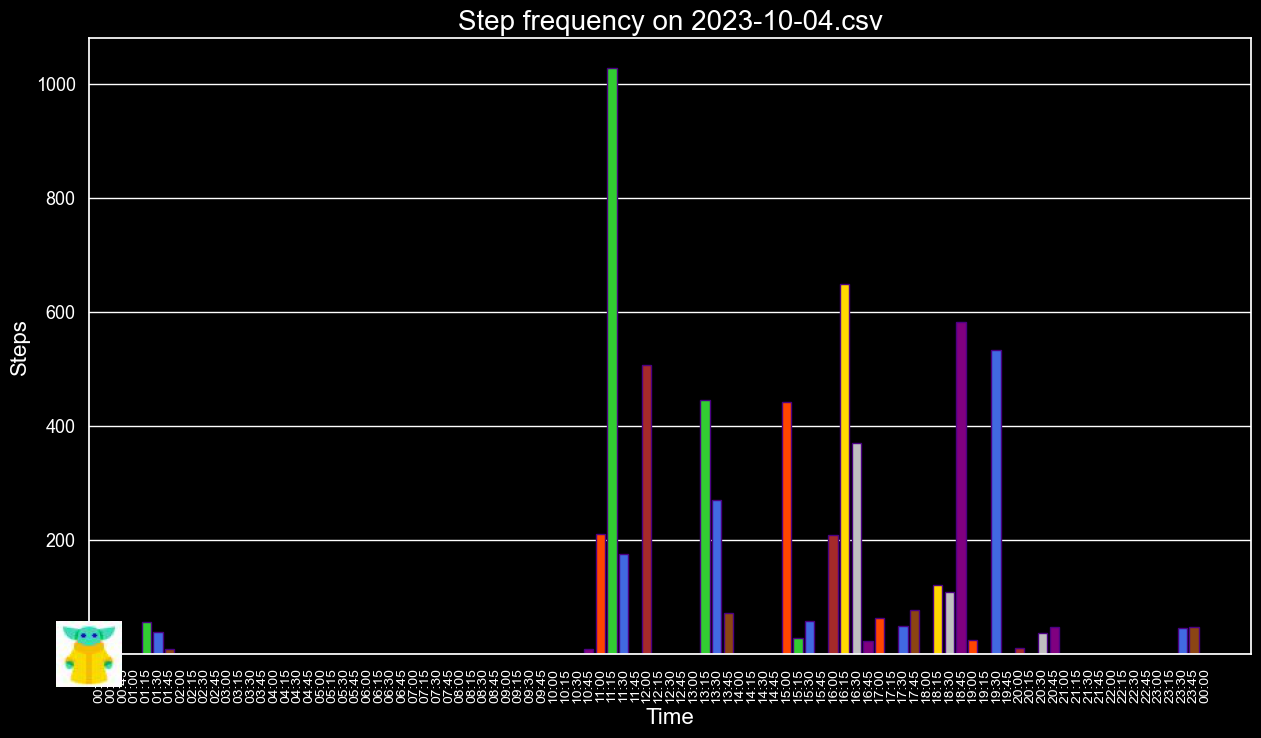

In [570]:
show_step_frequency(df04, data04)


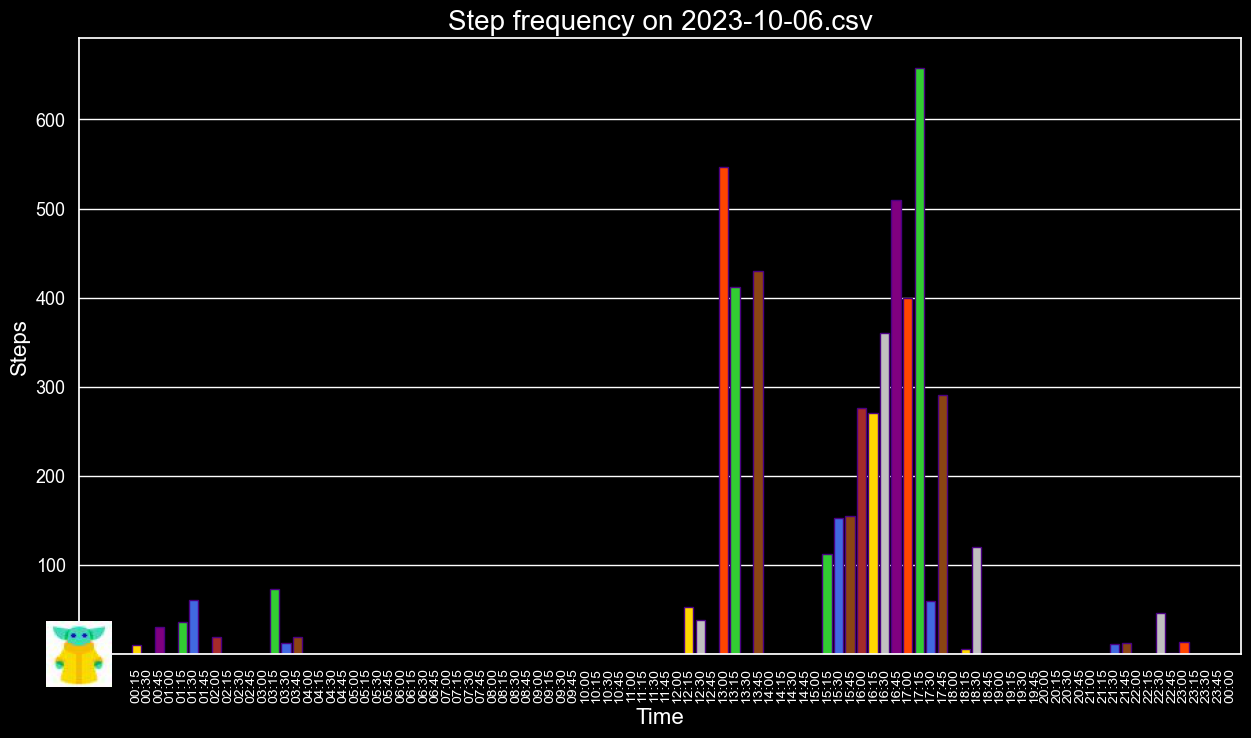

In [571]:
show_step_frequency(df06, data06)

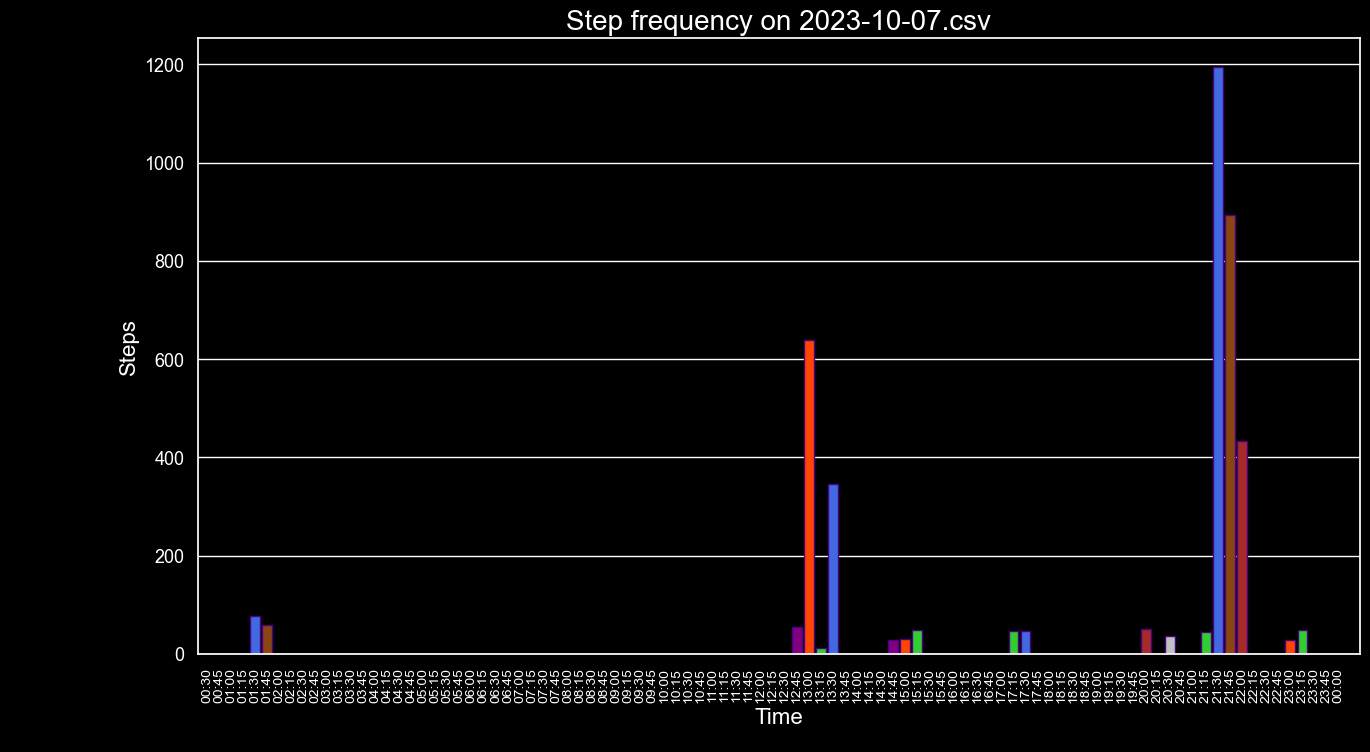

In [572]:
show_step_frequency(df07, data07)

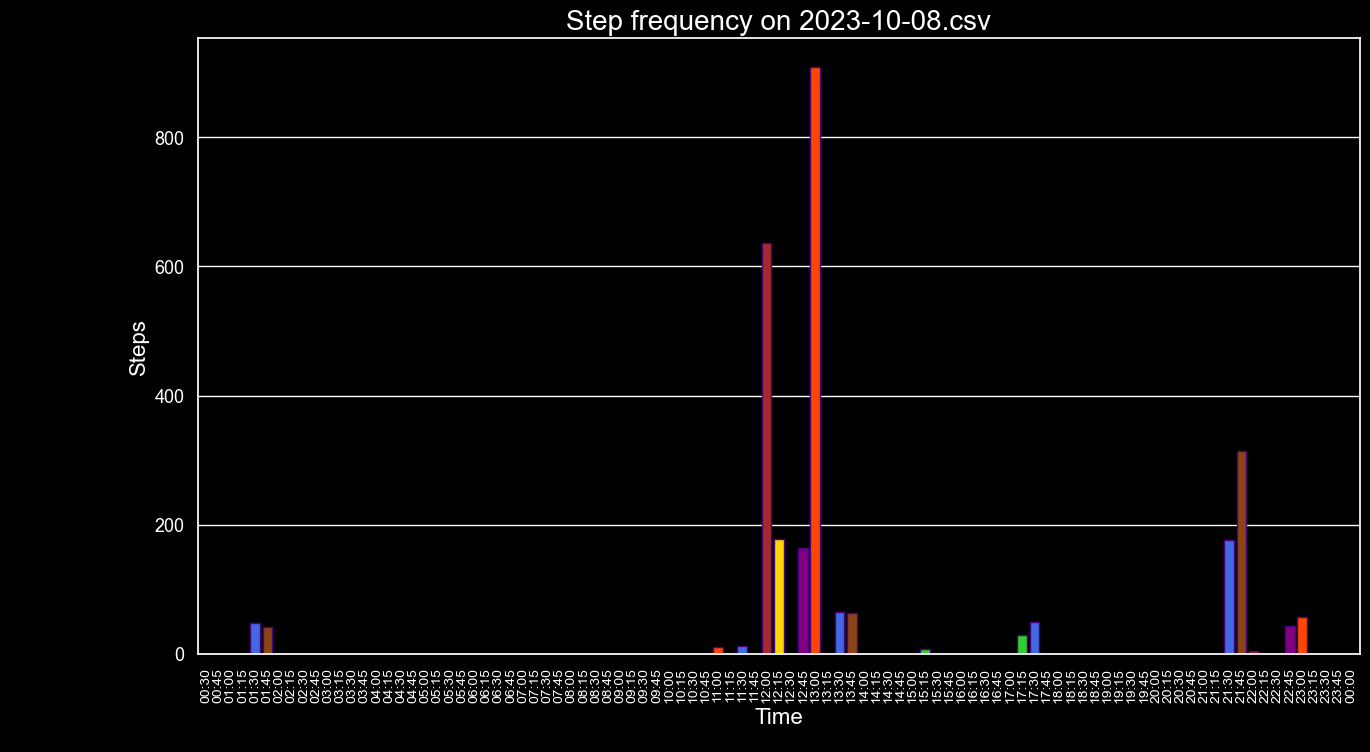

In [573]:
show_step_frequency(df08, data08)

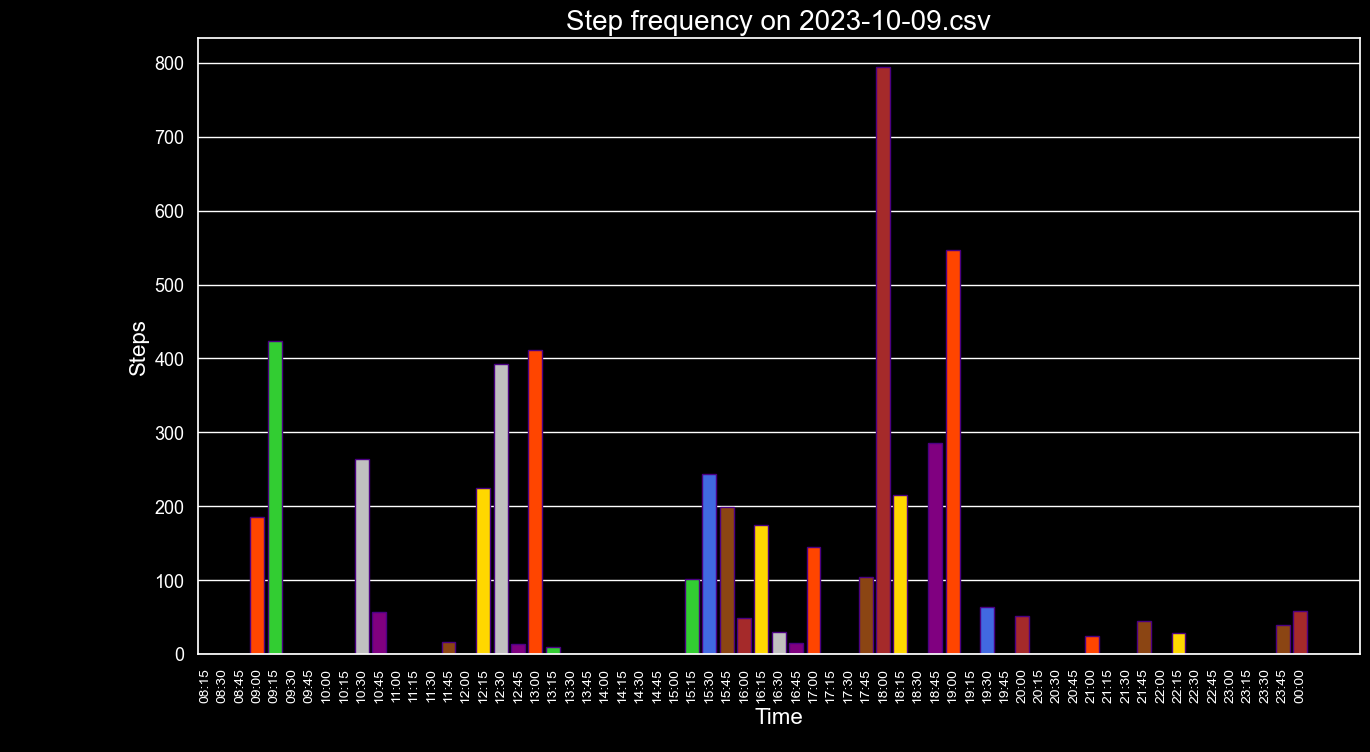

In [574]:
show_step_frequency(df09, data09)

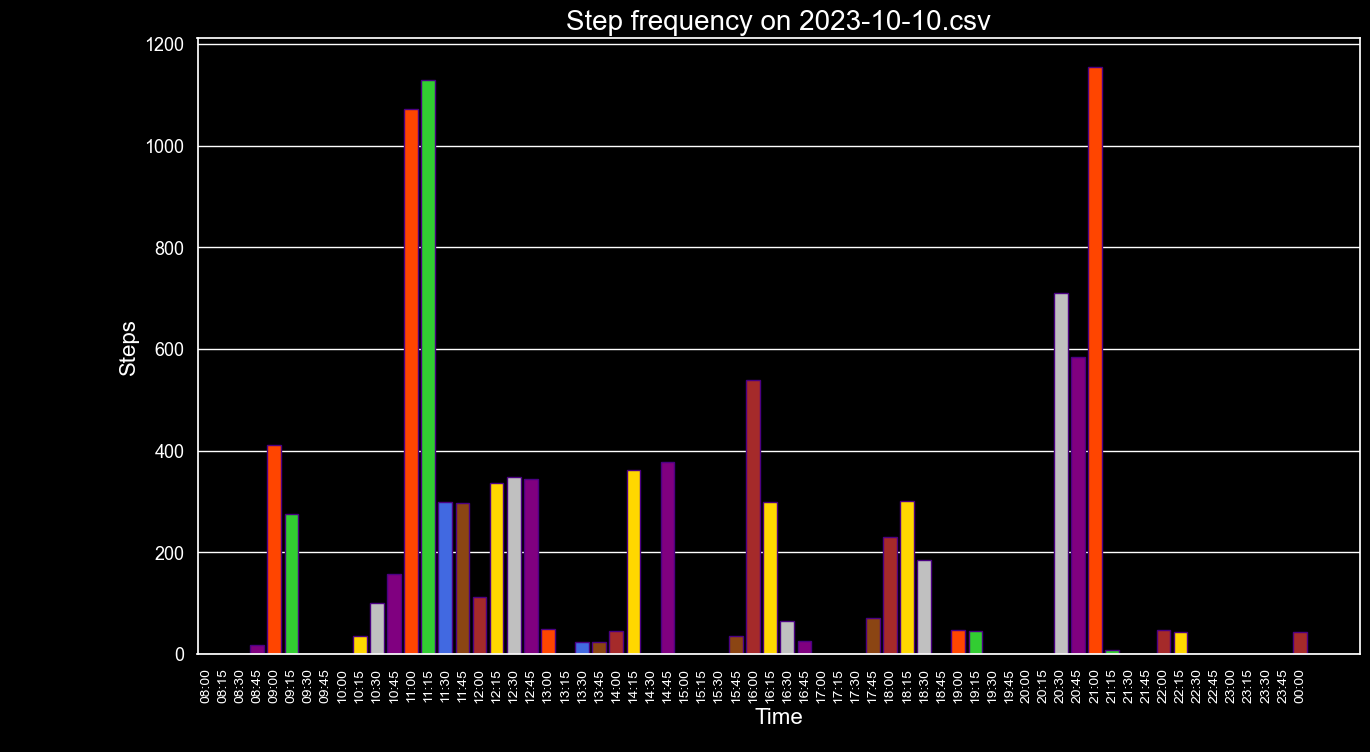

In [575]:
show_step_frequency(df10, data10)

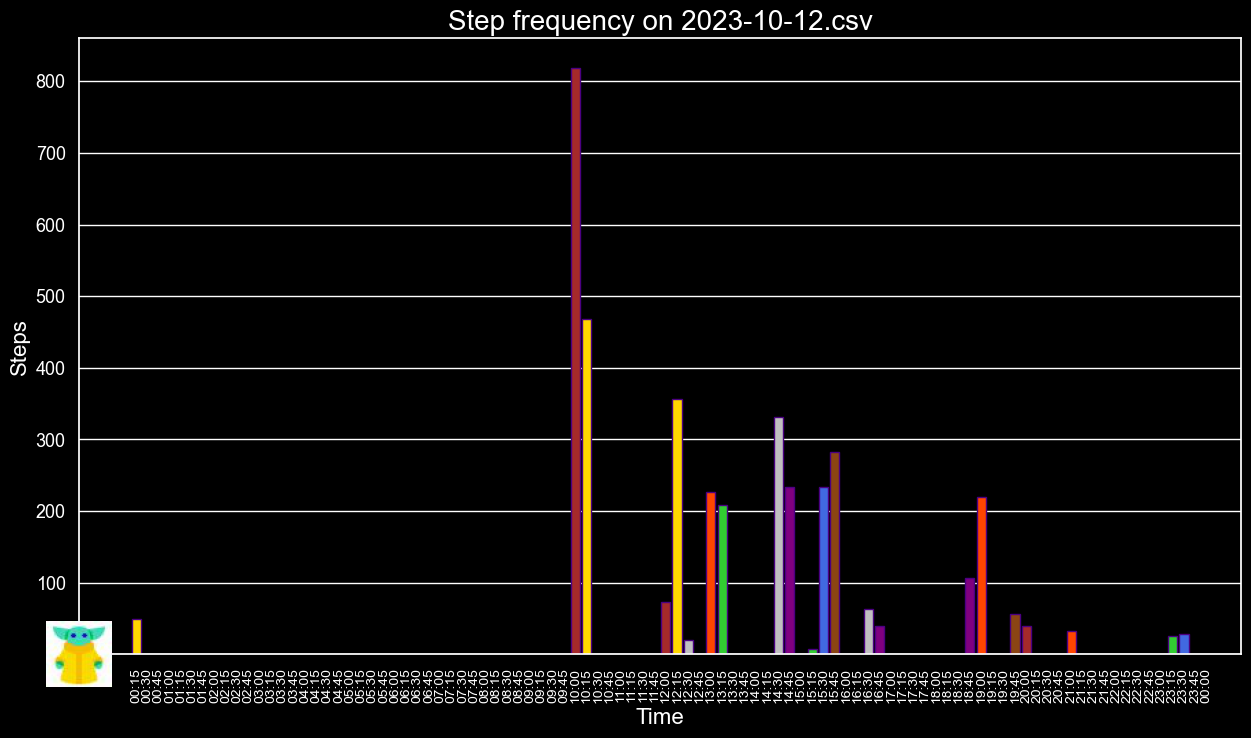

In [576]:
show_step_frequency(df12, data12)

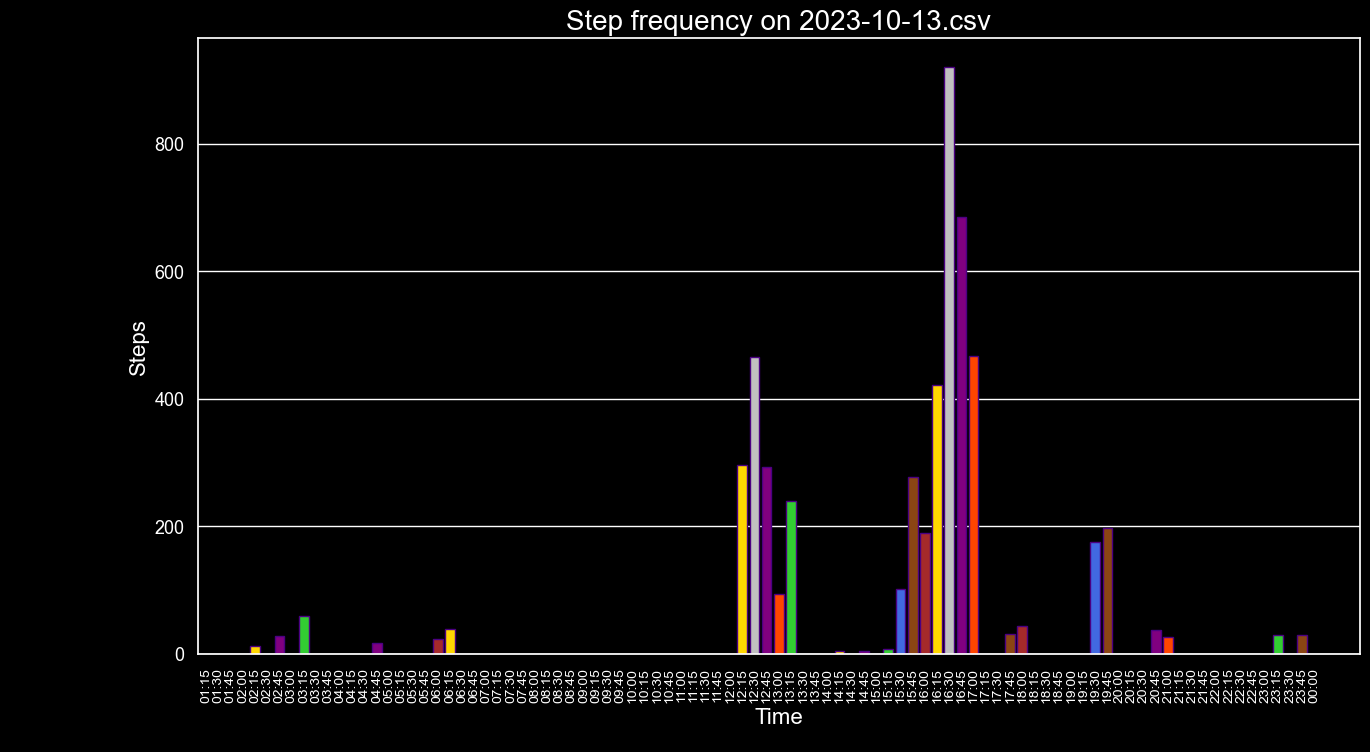

In [577]:
show_step_frequency(df13, data13)

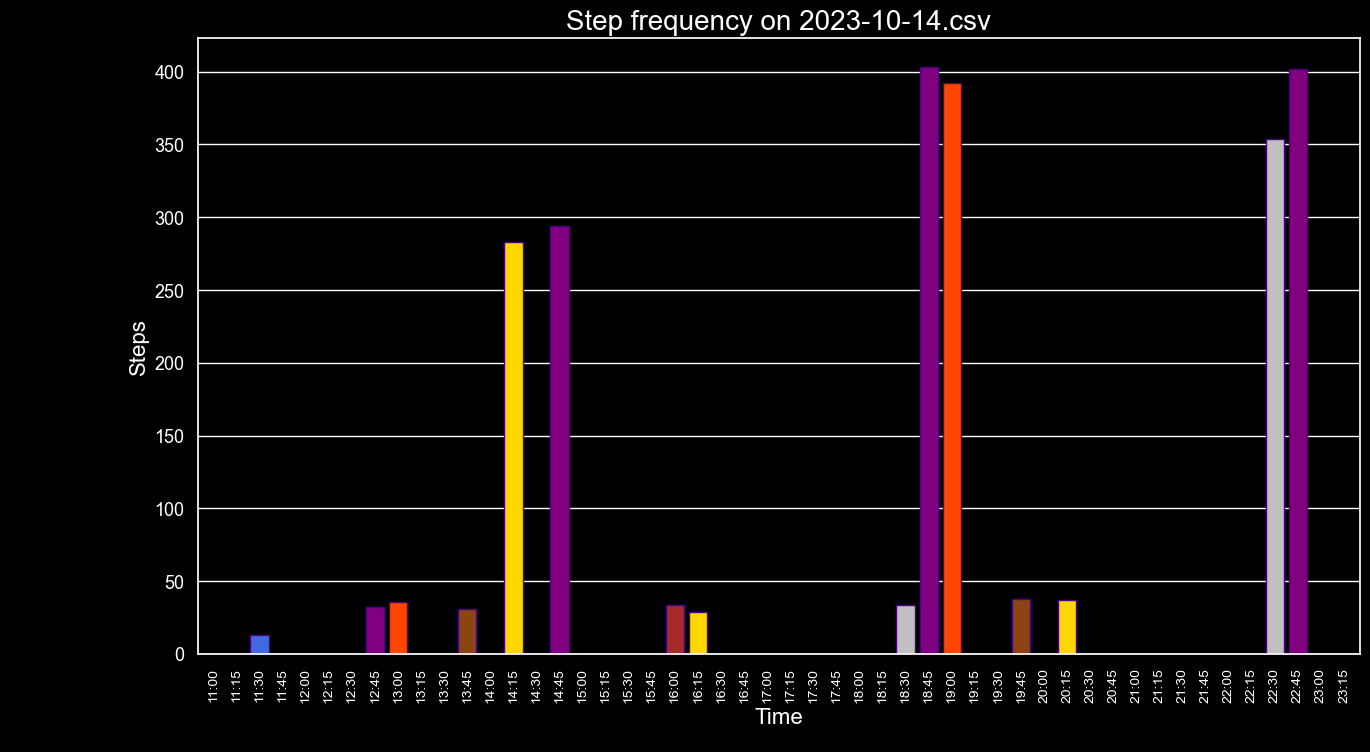

In [578]:
show_step_frequency(df14, data14)

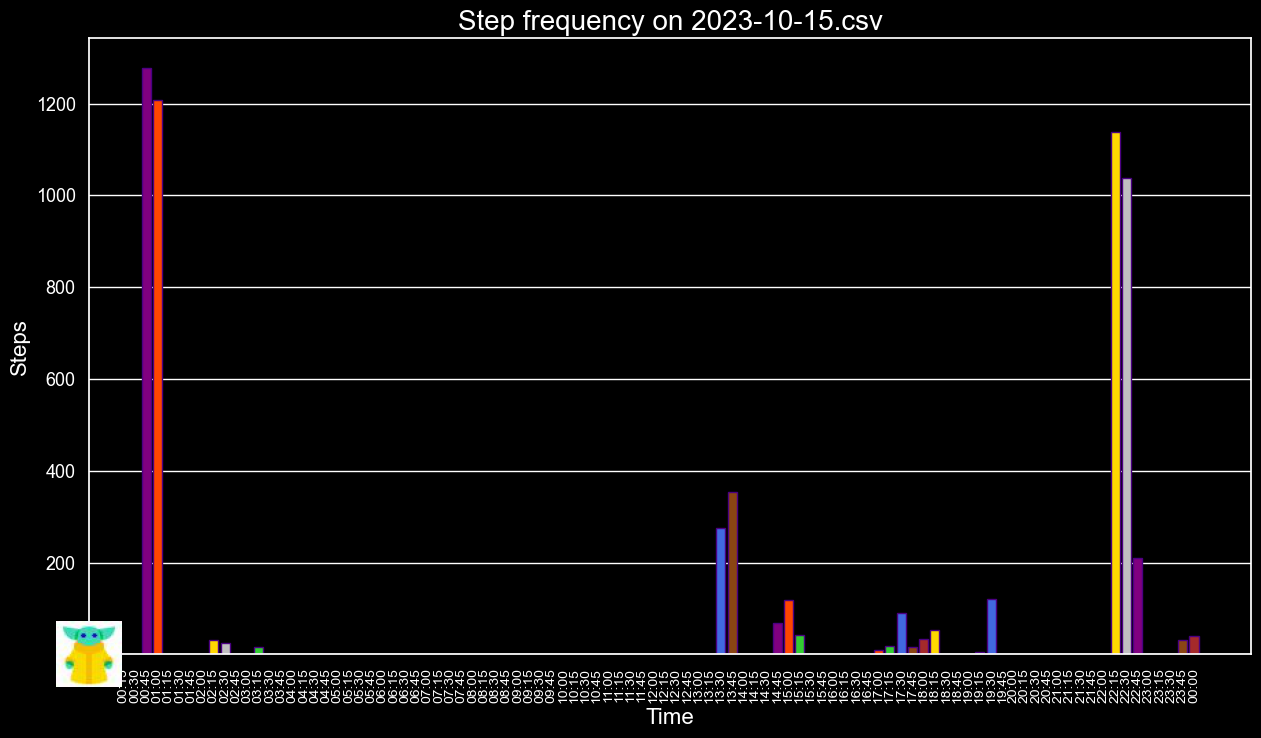

In [579]:
show_step_frequency(df15, data15)

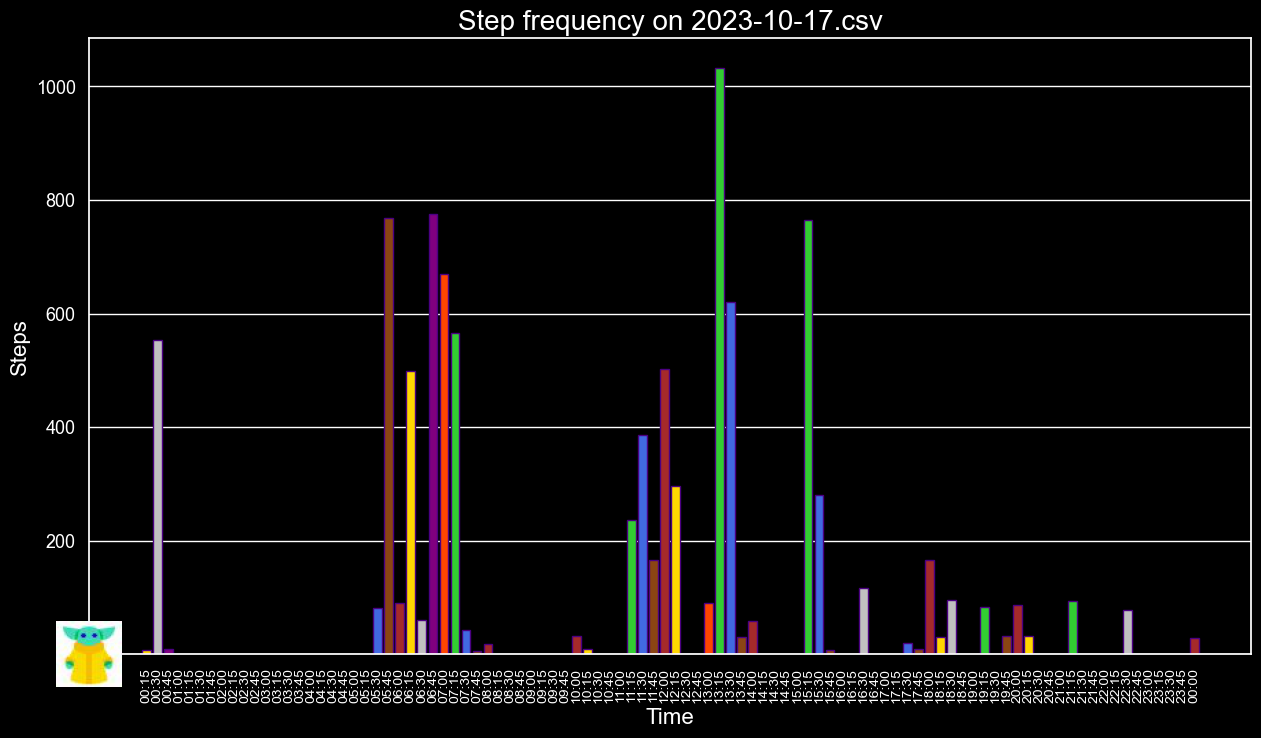

In [580]:
show_step_frequency(df17, data17)

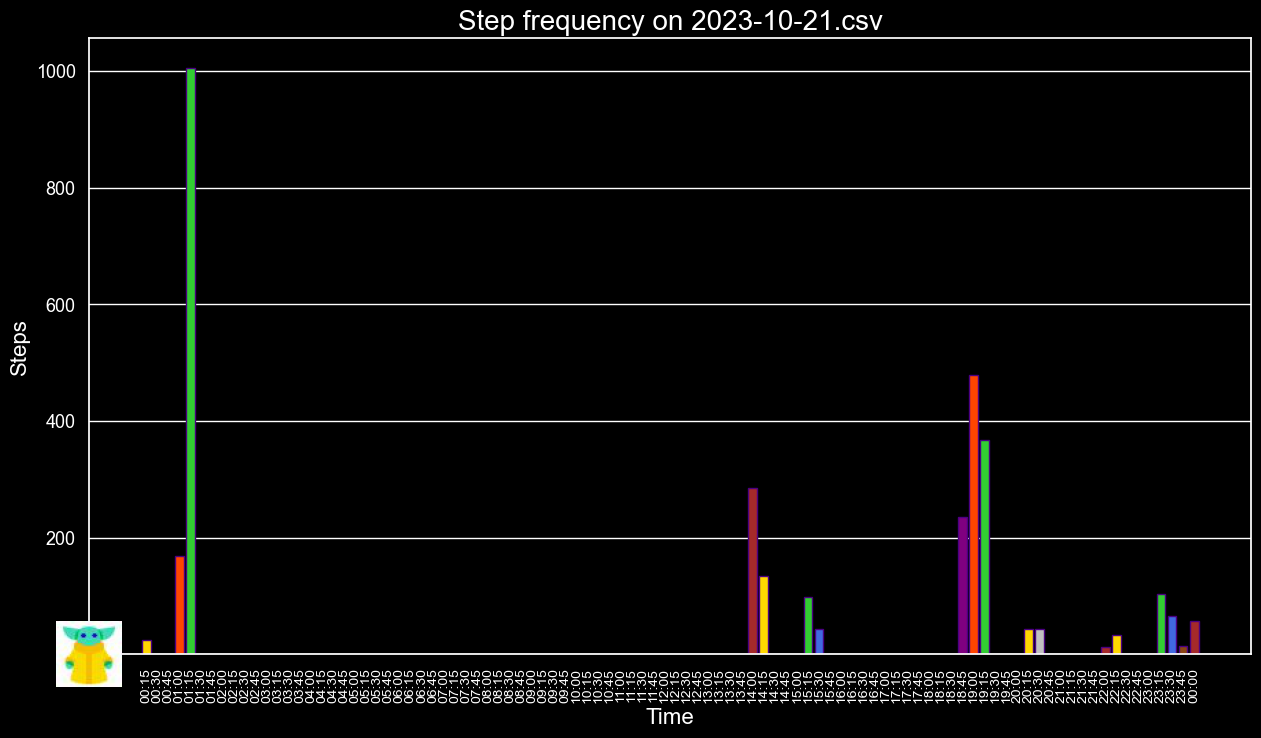

In [581]:
show_step_frequency(df21, data21)

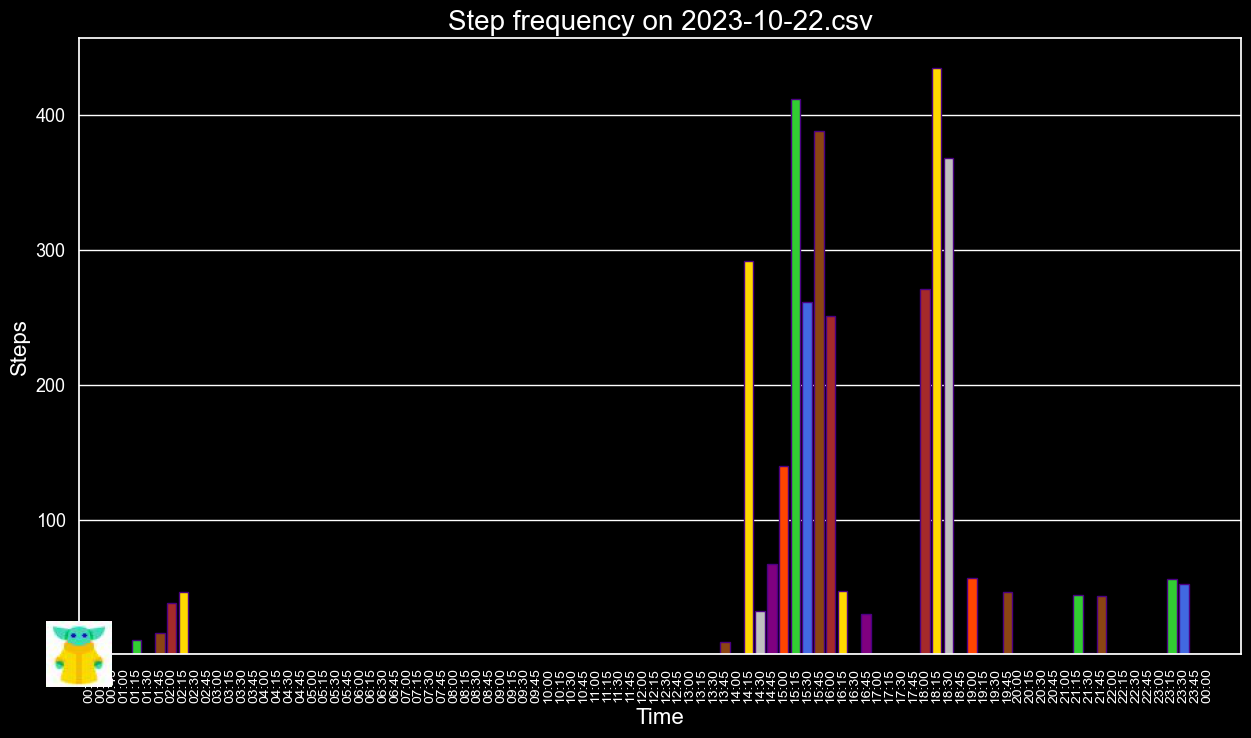

In [582]:
show_step_frequency(df22, data22)

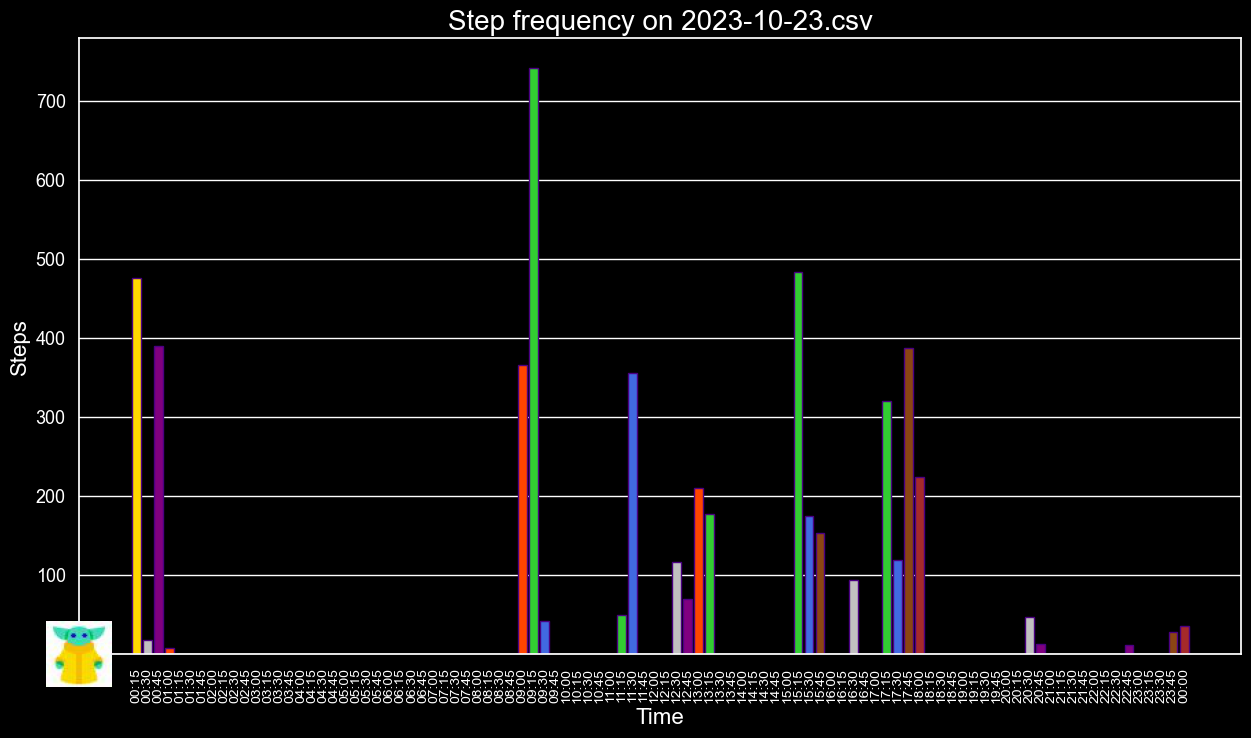

In [583]:
show_step_frequency(df23, data23)

In [584]:
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

def show_step_frequency(df_step, date=None):
    # This function allows us to see the frequency of a given date

    plt.style.use('dark_background')
    plt.figure(figsize=(15, 8))

    if date:
        date = datetime.strptime(date, "%Y-%m-%d")  # date'i datetime nesnesine çevir
        data = df_step[df_step['End time'].dt.date == date.date()]
        sns.kdeplot(data['Step count'], fill=True, color="lightcoral")
        plt.title(f"Step Frequency on {date.date()}")
    else:
        sns.kdeplot(df_step['Step count'], fill=True, color="lightcoral")
        plt.title("Step Frequency")

    plt.xlabel("Steps")
    plt.ylabel("Density")
    plt.grid(axis='y')

    plt.show()



In [585]:
def get_step_frequency(df):
    # We will get the walking frequency for every day. To achieve this we will use the following formula:
    # on existing values, values are more packed if deviation is higher, and vice versa.    
    return df["Step count"].dropna().std()

get_step_frequency(df04),get_step_frequency(df06),get_step_frequency(df07),get_step_frequency(df08),get_step_frequency(df09),get_step_frequency(df10),get_step_frequency(df12),get_step_frequency(df13),get_step_frequency(df14),get_step_frequency(df15),get_step_frequency(df17),get_step_frequency(df21),get_step_frequency(df22),get_step_frequency(df23);


<h2 style="color: Yellow;">Merging Sleep and step data
<h4 style="color: Yellow;">To facilitate data analysis, the two sets of data (sleep and step data) are combined into a unified data frame.

In [644]:
new_df = pd.DataFrame(new_df)
df_totalstep = pd.DataFrame(df_totalstep)

new_df['Date'] = pd.to_datetime(new_df['Date'], format='%Y-%m-%d')
df_totalstep['Date'] = pd.to_datetime(df_totalstep['Date'], format='%d/%m/%Y')

merged_df = new_df.merge(df_totalstep, on='Date', how='inner')
merged_df['Step Frequency'] = [get_step_frequency(df04), get_step_frequency(df06), get_step_frequency(df07), get_step_frequency(df10), get_step_frequency(df12), get_step_frequency(df13), get_step_frequency(df14), get_step_frequency(df15), get_step_frequency(df17), get_step_frequency(df21), get_step_frequency(df22), get_step_frequency(df23)]
merged_df[' Time in Bed(hours)'] = merged_df[' Time in Bed (mins)']/60
merged_df;

In [588]:
# IQR method
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    filtered_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
    return filtered_df

merged_df = remove_outliers(merged_df, 'Steps')
merged_df;

In [589]:
# IQR method
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    filtered_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
    return filtered_df

merged_df = remove_outliers(merged_df, 'Steps')

styles=[{'selector': 'caption','props': [
        ('color', 'yellow'),
        ('caption-side', 'top'),
        ('fontsize', '12')]}, 
       
        {'selector': 'th', 'props': [
        ('background-color', 'black'), 
        ('color', 'yellow'),
        ("border", "solid white")]}, 
       
        {"selector" :"td", "props": [
        ('background-color', 'Black'), 
        ('color', 'Yellow'),
        ("border", "solid white")]}]


style=merged_df.style.set_caption("Merged data").set_table_styles(styles)

style

,Date,Time in Bed (mins),Sleep quality,Awake duration (mins),REM sleep duration (mins),Light sleep duration (mins),Deep sleep duration (mins),Steps,Distance,Floors Ascended,Step Frequency,Time in Bed(hours)
0,2023-10-04 00:00:00,485,80,30,35,195,225,6389,4.100000,6,247.934109,8.083333
1,2023-10-06 00:00:00,493,72,45,58,60,330,5205,3.600000,6,191.061483,8.216667
2,2023-10-07 00:00:00,486,72,15,6,60,405,843,0.600000,0,339.884879,8.100000
3,2023-10-10 00:00:00,536,58,150,0,221,165,10267,6.500000,11,308.351803,8.933333
4,2023-10-12 00:00:00,458,15,315,0,128,15,3952,2.700000,8,194.244886,7.633333
5,2023-10-13 00:00:00,545,77,15,5,255,270,5194,3.500000,7,226.586112,9.083333
6,2023-10-14 00:00:00,541,68,135,31,135,240,2431,1.600000,7,167.136471,9.016667
7,2023-10-15 00:00:00,540,63,165,120,195,60,6230,4.400000,6,430.303459,9.000000
8,2023-10-17 00:00:00,486,59,75,6,60,345,9545,6.100000,5,277.535052,8.100000
9,2023-10-21 00:00:00,537,44,210,27,150,150,3315,2.300000,8,244.985714,8.950000


In [590]:
merged_df;

In [591]:
column_names = merged_df.columns
column_names;

<h1 style="color: Yellow;">Data analysis
<h4 style="color: Yellow;">Following data compilation comes analyzing the merged data frames with the intention to finding correlation between the variables.

<h2 style="color: Yellow;">Heatmaps Diagrams
<h4 style="color: Yellow;">Correlations are examined using heatmaps, which illustrate the strength of the correlation by displaying color variations. Darker colors indicate negative correlations, while brighter colors signify positive correlations. Three correlation heatmaps are utilized, namely Pearson, Spearman, and Kendall.

<h3 style="color: Yellow;">Pearson Heatmap Diagram
<h4 style="color: Yellow;">-The Pearson correlation coefficient, often denoted as "r," measures the linear relationship between two continuous variables. 
<h4 style="color: Yellow;">-It quantifies the strength and direction of the linear association between the variables. 
<h4 style="color: Yellow;">-It ranges from -1 (perfect negative correlation) to 1 (perfect positive correlation), with 0 indicating no linear correlation.

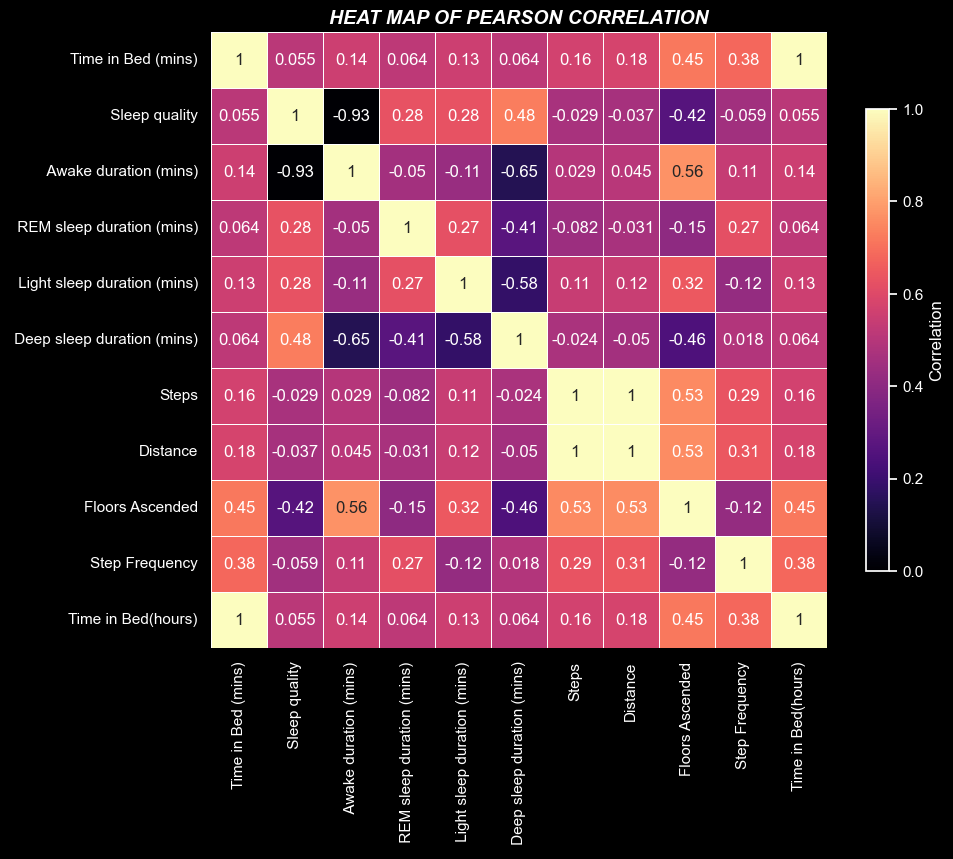

In [592]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = merged_df.select_dtypes(include=['number'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8), facecolor='black')

heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='magma', linewidths=0.5, cbar=False)

ax = plt.gca()
ax.set_facecolor('black')

cax = plt.imshow([[0, 1]], cmap="magma")
cax.set_visible(False)
cbar = plt.colorbar(cax, ax=heatmap, shrink=0.75)
cbar.set_label('Correlation', color='white')
cbar.outline.set_edgecolor('white')
cbar.ax.yaxis.set_tick_params(color='white')
cbar.ax.xaxis.set_tick_params(color='white')
plt.setp(heatmap.get_xticklabels(), color="white")
plt.setp(heatmap.get_yticklabels(), color="white")
plt.title("HEAT MAP OF PEARSON CORRELATION", color='white', fontsize=14, fontweight='bold', fontstyle='italic')

plt.show()


<h3 style="color: Yellow;">Spearman Heatmap Diagrams
<h4 style="color: Yellow;">-The Spearman rank correlation, denoted as "ρ" (rho), assesses the strength and direction of the monotonic relationship between two variables.
<h4 style="color: Yellow;">-It is used when the data is not normally distributed or when there are outliers.
<h4 style="color: Yellow;">-It ranks the data points and calculates the correlation based on the ranks, making it more robust to non-linear relationships.

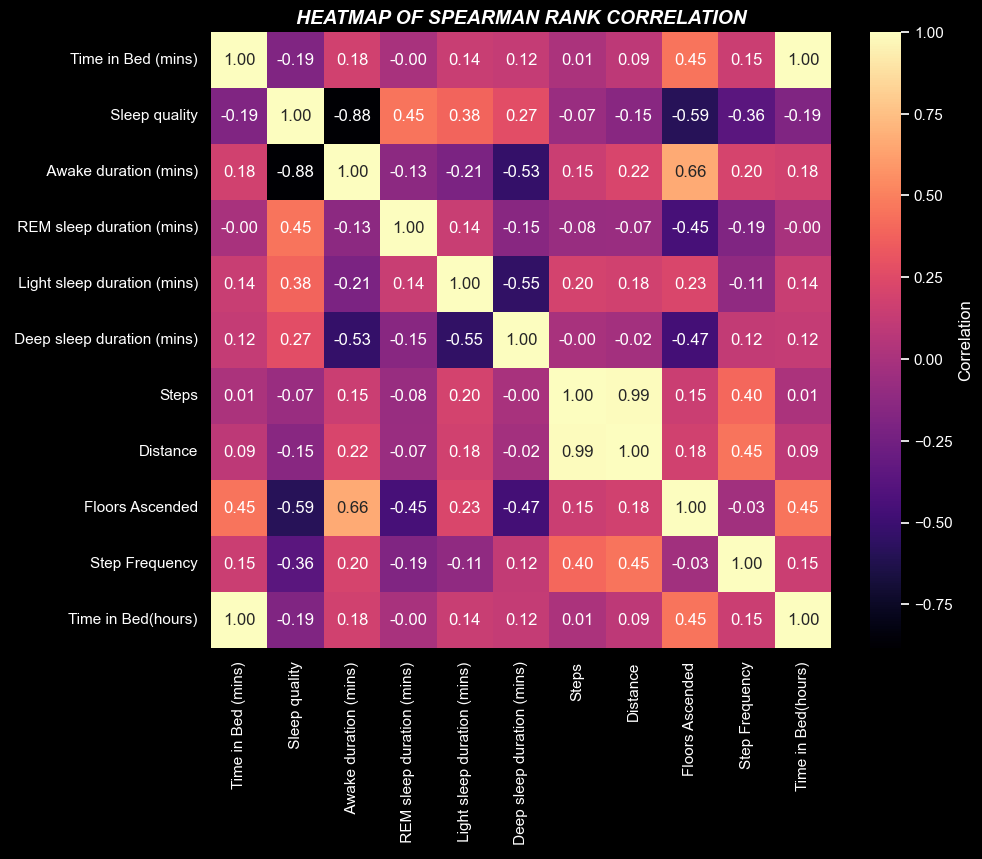

In [593]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

if 'Date' in merged_df.columns:
    merged_df = merged_df.drop(columns=['Date'])

spearman_corr = merged_df.corr(method='spearman', numeric_only=None)

plt.figure(figsize=(10, 8), facecolor='black')

heatmap = sns.heatmap(spearman_corr, annot=True, cmap='magma', fmt=".2f")

plt.setp(heatmap.get_xticklabels(), color="white")
plt.setp(heatmap.get_yticklabels(), color="white")

cbar = heatmap.collections[0].colorbar
cbar.set_label('Correlation', color='white')
cbar.outline.set_edgecolor('white')
cbar.ax.yaxis.set_tick_params(color='white')
cbar.ax.xaxis.set_tick_params(color='white')

plt.title("HEATMAP OF SPEARMAN RANK CORRELATION", color='white', fontsize=14, fontweight='bold', fontstyle='italic')

plt.show()



<h3 style="color: Yellow;">Kendall Heatmap Diagrams
<h4 style="color: Yellow;">-The Kendall rank correlation, denoted as "τ" (tau), measures the strength and direction of the ordinal association between two variables.
<h4 style="color: Yellow;">-It is used for non-parametric data and is robust against outliers and data distribution.
<h4 style="color: Yellow;">-Kendall's τ counts the number of concordant and discordant pairs of data points and calculates the correlation based on these counts.

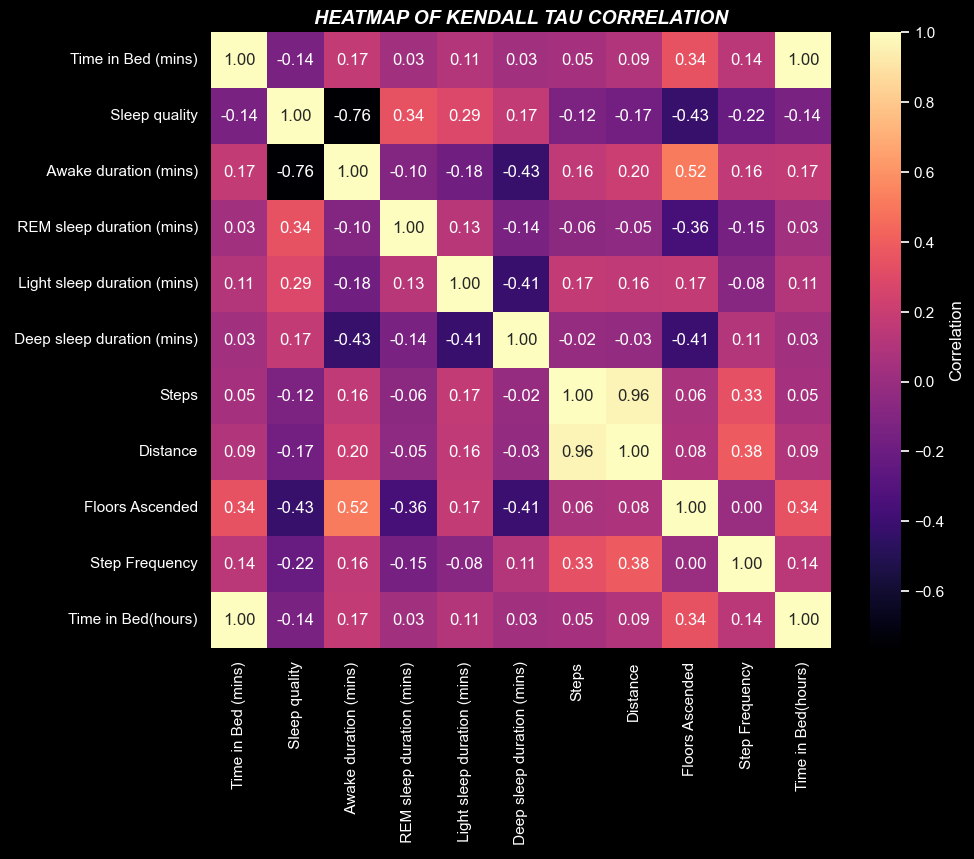

In [594]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


spearman_corr = merged_df.corr(method='kendall', numeric_only=None)

plt.figure(figsize=(10, 8), facecolor='black')

heatmap = sns.heatmap(spearman_corr, annot=True, cmap='magma', fmt=".2f")

plt.setp(heatmap.get_xticklabels(), color="white")
plt.setp(heatmap.get_yticklabels(), color="white")

cbar = heatmap.collections[0].colorbar
cbar.set_label('Correlation', color='white')
cbar.outline.set_edgecolor('white')
cbar.ax.yaxis.set_tick_params(color='white')
cbar.ax.xaxis.set_tick_params(color='white')

plt.title("HEATMAP OF KENDALL TAU CORRELATION", color='white', fontsize=14, fontweight='bold', fontstyle='italic')
plt.show()

In [595]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
regr=linear_model.LinearRegression()
x=merged_df['Step Frequency'].values.reshape(-1,1)
y=merged_df[' Sleep quality'].values.reshape(-1,1)
regr.fit(x,y);

<h2 style="color: Yellow;">Post heatmap analysis
<h4 style="color: Yellow;">After analyzing the step frequency it was found thatcorrelation of step and step frequency with sleep quality is quite low, with the highest correlation being negative found between awake time and sleep quality. This argument makes sense, since a longer awake time would indicate worse sleep quality. Further data gathering may be required to analyze the correlation between sleep quality and activity level in steps. 

<h2 style="color: Yellow;">Scatter plots
<h4 style="color: Yellow;">A scatter plot is a graphical representation used in statistics and data analysis to visualize the relationship between two variables. It consists of a grid where each point on the grid represents a single data point with values for both variables. Typically, one variable is plotted on the horizontal axis (x-axis), and the other variable is plotted on the vertical axis (y-axis).

<h4 style="color: Yellow;">The main purpose of a scatter plot is to show how changes in one variable may be associated with changes in another. Depending on the pattern of points in the plot, you can infer the type of relationship between the two variables:

<h5 style="color: Yellow;">1.Positive Correlation: If the points tend to cluster in a rising pattern from the bottom-left to the top-right of the plot, it indicates a positive correlation, meaning that as one variable increases, the other tends to increase as well.

<h5 style="color: Yellow;">2.Negative Correlation: If the points tend to cluster in a descending pattern from the top-left to the bottom-right of the plot, it suggests a negative correlation, meaning that as one variable increases, the other tends to decrease.

<h5 style="color: Yellow;">3.No Correlation: If the points are scattered randomly without any clear pattern, it indicates no significant correlation between the two variables.

<h2 style="color: Yellow;">Scatter plot between Sleep quality and Step frequency
<h4 style="color: Yellow;">To better undersand correlation between activity and sleep quality a scatter plot is made to see the how the data is distributed. Based on the initial heatmap analysis and validation through heatmaps, there is little correlation between step frequency and Sleep quality. 

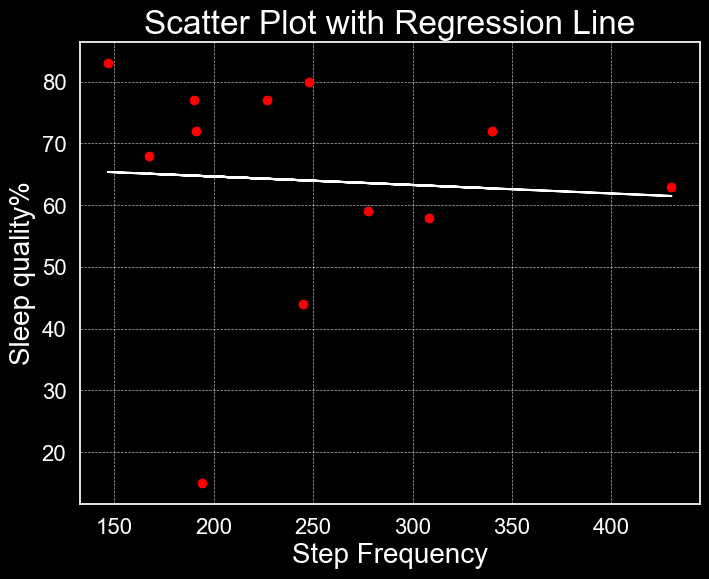

In [596]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(facecolor='black') 
ax.scatter(merged_df['Step Frequency'], merged_df[' Sleep quality'], c='red')

m, b = np.polyfit(merged_df['Step Frequency'], merged_df[' Sleep quality'], 1)
ax.plot(merged_df['Step Frequency'], m * merged_df['Step Frequency'] + b, color='white')

fig.set_size_inches(8, 6)
ax.set_xlabel('Step Frequency', color='white',fontsize=20)
ax.set_ylabel('Sleep quality%', color='white',fontsize=20)

ax.set_facecolor('black')

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, color='white')
ax.set_title('Scatter Plot with Regression Line', color='white',fontsize=24)

plt.show()


In [597]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
regr=linear_model.LinearRegression()
x=merged_df['Steps'].values.reshape(-1,1)
y=merged_df[' Sleep quality'].values.reshape(-1,1)
regr.fit(x,y);

<h2 style="color: Yellow;">Scatter plot between Sleep quality and Steps

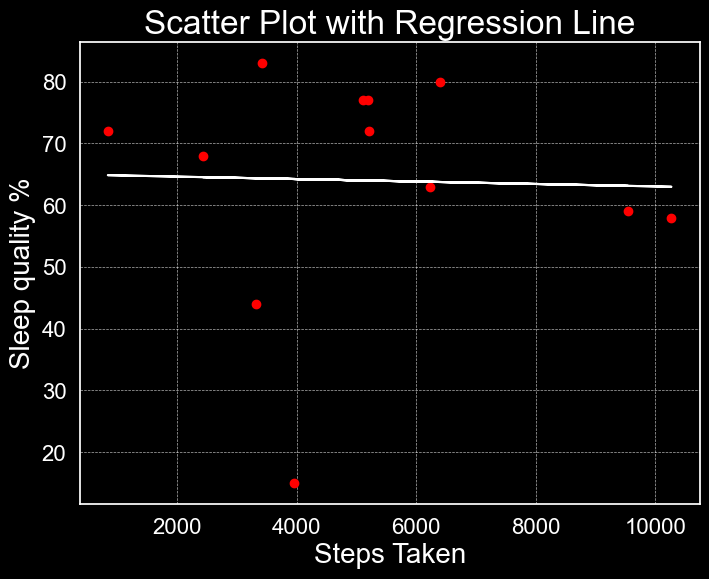

In [598]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(facecolor='black') 

ax.scatter(merged_df['Steps'], merged_df[' Sleep quality'], c='red')

m, b = np.polyfit(merged_df['Steps'], merged_df[' Sleep quality'], 1)
ax.plot(merged_df['Steps'], m * merged_df['Steps'] + b, color='white')

ax.set_facecolor('black')

fig.set_size_inches(8, 6)
ax.set_xlabel('Steps Taken', color='white',fontsize=20)
ax.set_ylabel('Sleep quality %', color='white', fontsize=20)

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, color='white')
ax.set_title('Scatter Plot with Regression Line', color='white',fontsize=24)

plt.show()



<h4 style="color: Yellow;">After going through the scatter plot of Sleep quality with the total step in a day,  hinting that a higher step actually reduces sleep quality which doesn't coincide with the study on Physical Activity and Sleep Quality Association in Different Populations: A Meta-Analysis "Physical activity had an obvious effect on the sleep quality of children and middle-aged and elderly people but had no obvious effect on young people"

<h1 style="color: Yellow;">Data analysis explanation
<h4 style="color: yellow;">The intention of the boxplot and histogram graphs of the data is to better illustrate in what range the data is found and with mean, mode, median, 25th quantile and 75th quantile is given of the three focused data sets, which is the Sleep quality, Steps and Step frequency.
<h2 style="color: Yellow;">Box Plot (Box-and-Whisker Plot):
<h5 style="color: Yellow;">-A box plot is a graphical representation used in statistics to display the distribution and summary statistics of a dataset.
<h5 style="color: Yellow;">-It consists of a rectangular "box" and two "whiskers" that extend from the box. The box represents the interquartile range (IQR), which is the middle 50% of the data.
<h5 style="color: Yellow;">-The whiskers extend from the edges of the box to show the range of the data, excluding outliers. The "whisker" length is typically set to 1.5 times the IQR.
<h5 style="color: Yellow;">-The line inside the box represents the median, which is the middle value when the data is ordered.
<h5 style="color: Yellow;">-Outliers are individual data points that fall outside the whisker range and are often plotted as individual points.
<h5 style="color: Yellow;">-Box plots provide a quick and clear way to visualize the central tendency, spread, and potential outliers in a dataset.
<h2 style="color: Yellow;">Histogram:
<h5 style="color: Yellow;">-A histogram is a graphical representation used to display the distribution of a dataset, specifically the frequency or count of data points within various intervals or bins.
<h5 style="color: Yellow;">-It is created by dividing the range of data into equal intervals (bins) and counting the number of data points that fall into each bin.
<h5 style="color: Yellow;">-The bins are typically represented on the horizontal axis, while the frequencies or counts are shown on the vertical axis.
<h5 style="color: Yellow;">-Histograms provide a visual representation of the shape and characteristics of the data's distribution. They can reveal patterns, such as whether the data is normally distributed, skewed, or has multiple peaks.
<h5 style="color: Yellow;">-Histograms are particularly useful for understanding the underlying data distribution and can help identify potential outliers or clusters within the data.

<h2 style="color: Yellow;">Boxplots and histograms of sleep quality

In [599]:
merged_df[' Sleep quality'].describe();

In [600]:
import matplotlib.pyplot as plt

#plt.figure(facecolor='black')

#box = plt.boxplot(merged_df[' Sleep quality'])

#plt.xticks(color='white')
#plt.yticks(color='white')
#plt.title('Boxplot of Sleep Quality', color='white')


#for key in box.keys():
    #for element in box[key]:
       # plt.setp(element, color='white')

#plt.show()


In [601]:
#sns.histplot(merged_df[' Sleep quality'], color='blue', bins=10);
#plt.xlabel('Sleep Quality');
#plt.ylabel('Daily Number');
#plt.title('Sleep Quality Histogram');
#plt.show();

In [602]:
import seaborn as sns
import matplotlib.pyplot as plt

mean_value = merged_df[' Sleep quality'].mean()
mode_value = merged_df[' Sleep quality'].mode().values[0]
median_value = merged_df[' Sleep quality'].median()

#plt.figure(figsize=(8, 6))
#sns.histplot(merged_df[' Sleep quality'], color='skyblue', bins=10)

#plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
#plt.axvline(mode_value, color='green', linestyle='dashed', linewidth=2, label=f'Mode: {mode_value:.2f}')
#plt.axvline(median_value, color='purple', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')

#plt.legend()
#plt.gca().set_facecolor('black')

#plt.show()


<Figure size 800x600 with 0 Axes>

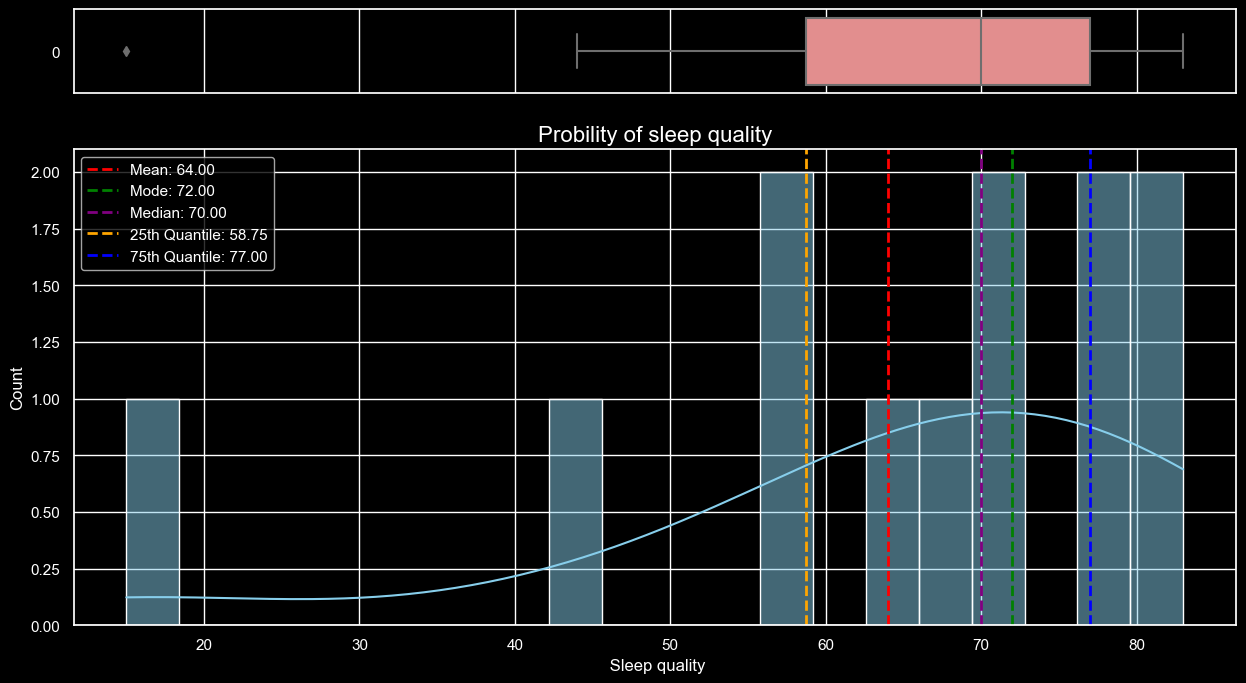

In [603]:
import seaborn as sns
import matplotlib.pyplot as plt

mean_value = merged_df[' Sleep quality'].mean()
mode_value = merged_df[' Sleep quality'].mode().values[0]
median_value = merged_df[' Sleep quality'].median()
quantile_25 = merged_df[' Sleep quality'].quantile(0.25)
quantile_75 = merged_df[' Sleep quality'].quantile(0.75)

plt.figure(figsize=(8, 6), facecolor='black')
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, facecolor='black')

sns.boxplot(merged_df[' Sleep quality'], ax=ax_box, orient="h", color='lightcoral')
ax_box.set_facecolor('black')


sns.histplot(merged_df[' Sleep quality'], ax=ax_hist, kde=True, color='skyblue', bins=20)
ax_hist.set_facecolor('black')

plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(mode_value, color='green', linestyle='dashed', linewidth=2, label=f'Mode: {mode_value:.2f}')
plt.axvline(median_value, color='purple', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
plt.axvline(quantile_25, color='orange', linestyle='dashed', linewidth=2, label=f'25th Quantile: {quantile_25:.2f}')
plt.axvline(quantile_75, color='blue', linestyle='dashed', linewidth=2, label=f'75th Quantile: {quantile_75:.2f}')

plt.title("Probility of sleep quality", color='white',fontsize=16)
plt.legend()
#plt.tight_layout()

for ax in [ax_box, ax_hist]:
    plt.setp(ax.get_xticklabels(), color='white')
    plt.setp(ax.get_yticklabels(), color='white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')

plt.show()



<h3 style="color: Yellow;">This histogram mixed with the boxplot shows that the median sleep quality is 70% but further data analysis is needed. 

<h2 style="color: Yellow;">Boxplots and histograms of Step data

In [604]:
merged_df['Steps'].describe();

In [605]:
import matplotlib.pyplot as plt

#plt.figure(facecolor='black')

#box = plt.boxplot(merged_df['Steps'])

#plt.xticks(color='white')
#plt.yticks(color='white')
#plt.title('Boxplot of Daily Step Count', color='white')


#for key in box.keys():
    #for element in box[key]:
        #plt.setp(element, color='white')

#plt.show()


In [606]:
import seaborn as sns
import matplotlib.pyplot as plt

#plt.figure(facecolor='black')

#sns.histplot(merged_df['Steps'], color='blue', bins=10)
#plt.xlabel('Steps', color='white')
#plt.ylabel('Daily Steps', color='white')
#plt.title('Daily Step Count Histogram', color='white')

#plt.xticks(color='white')
#plt.yticks(color='white')

#plt.show()



In [607]:
import seaborn as sns
import matplotlib.pyplot as plt

mean_value = merged_df['Steps'].mean()
mode_value = merged_df['Steps'].mode().values[0]
median_value = merged_df['Steps'].median()

sns.set_theme(style="darkgrid", rc={"axes.facecolor": "#1e1e1e", "grid.color": "0.2", "text.color": "white"})

#plt.figure(figsize=(8, 6), facecolor='black')

#sns.histplot(merged_df['Steps'], color='skyblue', bins=10)
#plt.title("Probability Mass Function of Steps", color='white')

#plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
#plt.axvline(mode_value, color='green', linestyle='dashed', linewidth=2, label=f'Mode: {mode_value:.2f}')
#plt.axvline(median_value, color='purple', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')

#plt.legend()
#plt.xlabel("Count", color='white')
#plt.ylabel("Steps", color='white')

#plt.show()


<Figure size 800x600 with 0 Axes>

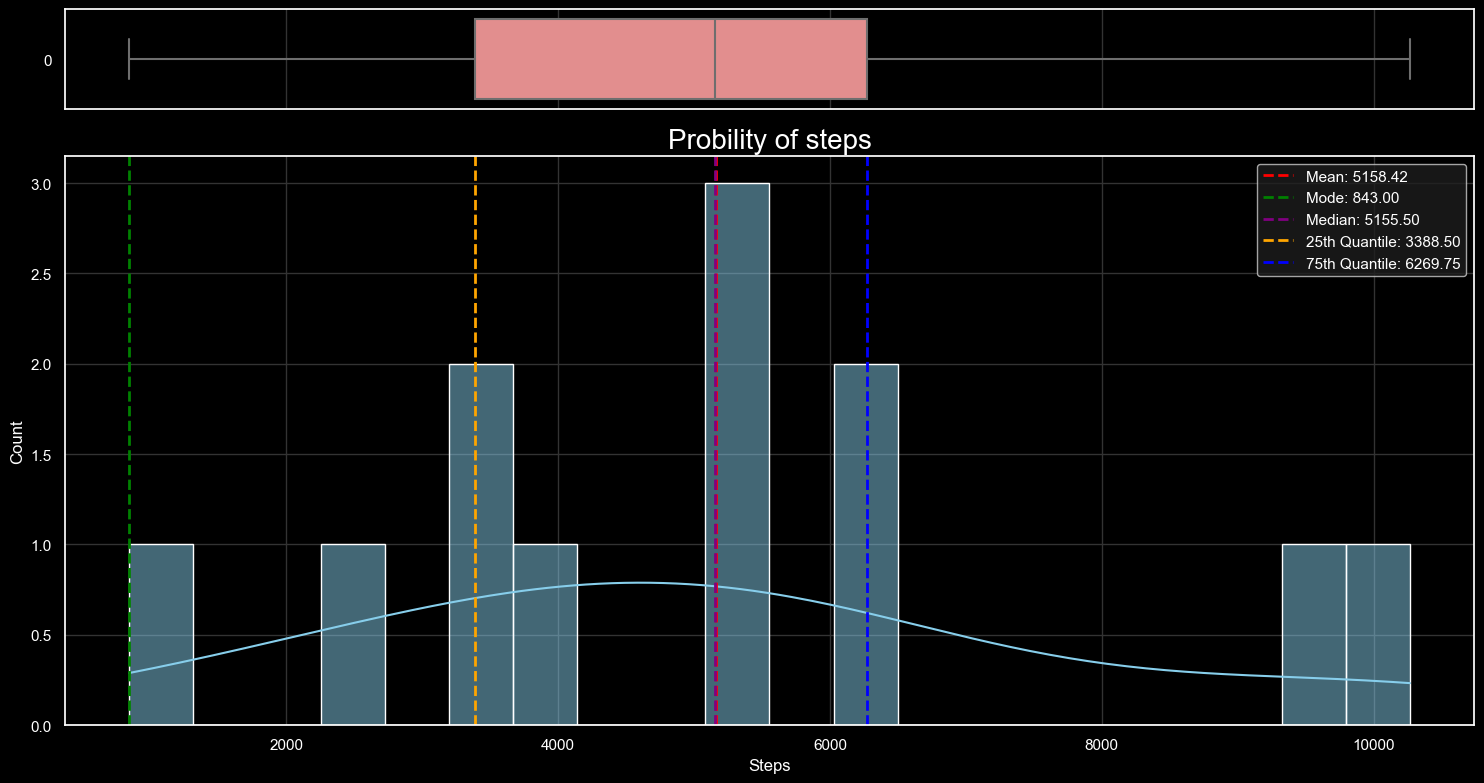

In [608]:
import seaborn as sns
import matplotlib.pyplot as plt

mean_value = merged_df['Steps'].mean()
mode_value = merged_df['Steps'].mode().values[0]
median_value = merged_df['Steps'].median()
quantile_25 = merged_df['Steps'].quantile(0.25)
quantile_75 = merged_df['Steps'].quantile(0.75)

plt.figure(figsize=(8, 6), facecolor='black')
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, facecolor='black')

sns.boxplot(merged_df['Steps'], ax=ax_box, orient="h", color='lightcoral')
ax_box.set_facecolor('black')

sns.histplot(merged_df['Steps'], ax=ax_hist, kde=True, color='skyblue', bins=20)
ax_hist.set_facecolor('black')

plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(mode_value, color='green', linestyle='dashed', linewidth=2, label=f'Mode: {mode_value:.2f}')
plt.axvline(median_value, color='purple', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
plt.axvline(quantile_25, color='orange', linestyle='dashed', linewidth=2, label=f'25th Quantile: {quantile_25:.2f}')
plt.axvline(quantile_75, color='blue', linestyle='dashed', linewidth=2, label=f'75th Quantile: {quantile_75:.2f}')

plt.title("Probility of steps", color='white', fontsize=20)
plt.legend()
plt.tight_layout()

for ax in [ax_box, ax_hist]:
    plt.setp(ax.get_xticklabels(), color='white')
    plt.setp(ax.get_yticklabels(), color='white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')

plt.show()

<h3 style="color: Yellow;">This histogram mixed with the boxplot shows that the median step count is 5158 steps.

<h2 style="color: Yellow;">Boxplots and histograms of Step frequency data

In [609]:
merged_df['Step Frequency'].describe();

In [610]:
import matplotlib.pyplot as plt

#plt.figure(facecolor='black')

#box = plt.boxplot(merged_df['Step Frequency'])

#plt.xticks(color='white')
#plt.yticks(color='white')
#plt.title('Boxplot of Step Frequency', color='white')


#for key in box.keys():
    #for element in box[key]:
        #plt.setp(element, color='white')

#plt.show()

In [611]:
import seaborn as sns
import matplotlib.pyplot as plt

#plt.figure(facecolor='black')

#sns.histplot(merged_df['Step Frequency'], color='blue', bins=10)
#plt.xlabel('Step Frequency', color='white')
#plt.ylabel('Daily Step Frequency', color='white')
#plt.title('Step Frequency Histogram', color='white')

#plt.xticks(color='white')
#plt.yticks(color='white')

#plt.show()


In [612]:
import seaborn as sns
import matplotlib.pyplot as plt

mean_value = merged_df['Step Frequency'].mean()
mode_value = merged_df['Step Frequency'].mode().values[0]
median_value = merged_df['Step Frequency'].median()

sns.set_theme(style="darkgrid", rc={"axes.facecolor": "#1e1e1e", "grid.color": "0.2", "text.color": "white"})

#plt.figure(figsize=(8, 6), facecolor='black')

#sns.histplot(merged_df['Step Frequency'], color='skyblue', bins=10)
#plt.title("Probability Mass Function of Step Frequency", color='white')

#plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
#plt.axvline(mode_value, color='green', linestyle='dashed', linewidth=2, label=f'Mode: {mode_value:.2f}')
#plt.axvline(median_value, color='purple', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')

#plt.legend()
#plt.xlabel("Step Frequency", color='white')
#plt.ylabel("Frequency", color='white')

#plt.show()


<Figure size 800x600 with 0 Axes>

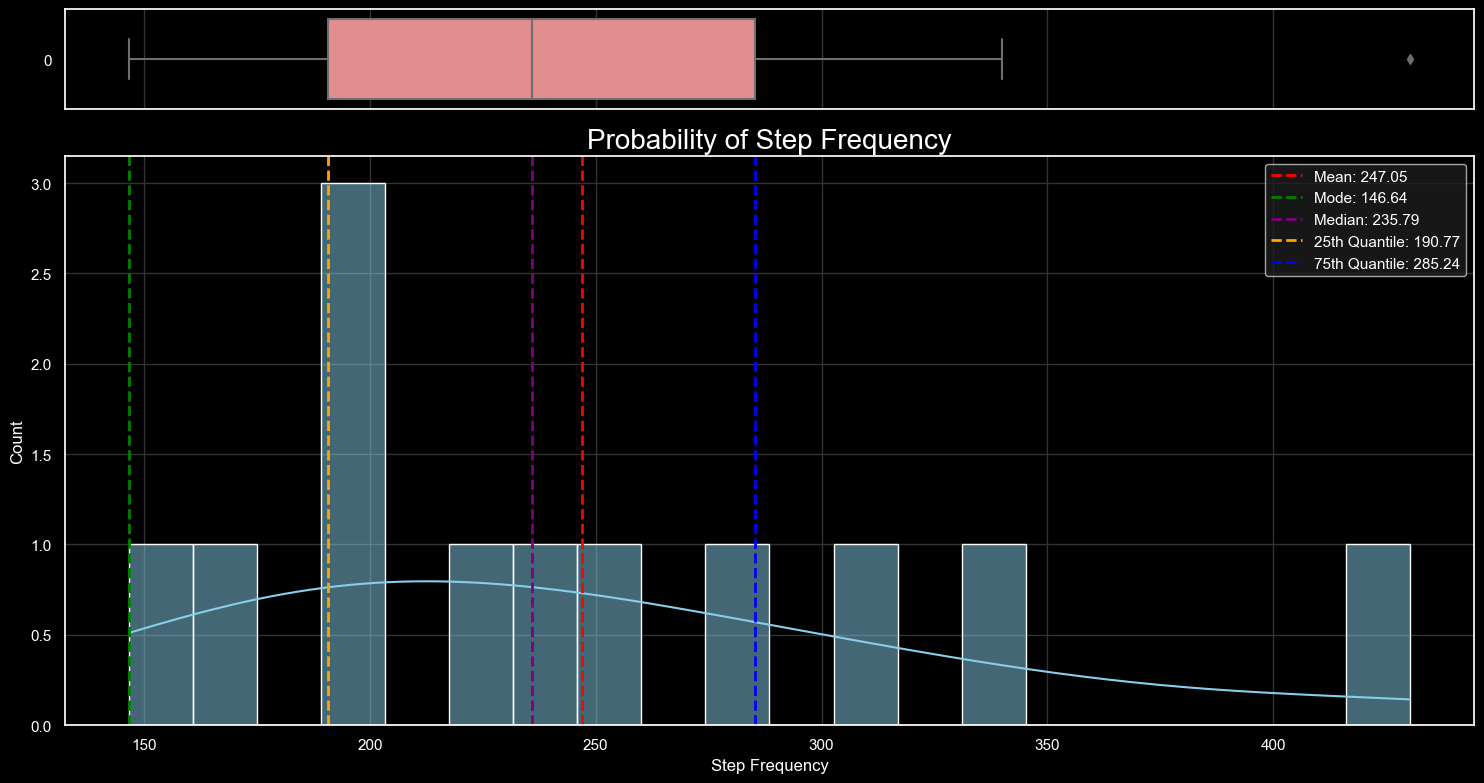

In [613]:
import seaborn as sns
import matplotlib.pyplot as plt

mean_value = merged_df['Step Frequency'].mean()
mode_value = merged_df['Step Frequency'].mode().values[0]
median_value = merged_df['Step Frequency'].median()
quantile_25 = merged_df['Step Frequency'].quantile(0.25)
quantile_75 = merged_df['Step Frequency'].quantile(0.75)

plt.figure(figsize=(8, 6), facecolor='black')
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, facecolor='black')

sns.boxplot(merged_df['Step Frequency'], ax=ax_box, orient="h", color='lightcoral')
ax_box.set_facecolor('black')

sns.histplot(merged_df['Step Frequency'], ax=ax_hist, kde=True, color='skyblue', bins=20)
ax_hist.set_facecolor('black')

plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(mode_value, color='green', linestyle='dashed', linewidth=2, label=f'Mode: {mode_value:.2f}')
plt.axvline(median_value, color='purple', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
plt.axvline(quantile_25, color='orange', linestyle='dashed', linewidth=2, label=f'25th Quantile: {quantile_25:.2f}')
plt.axvline(quantile_75, color='blue', linestyle='dashed', linewidth=2, label=f'75th Quantile: {quantile_75:.2f}')

plt.title("Probability of Step Frequency", color='white', fontsize=20)
plt.legend()
plt.tight_layout()

for ax in [ax_box, ax_hist]:
    plt.setp(ax.get_xticklabels(), color='white')
    plt.setp(ax.get_yticklabels(), color='white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')

plt.show()


<h3 style="color: Yellow;">This histogram mixed with the boxplot shows that the median step count frequency is 235 steps, however, after further examination from the scatter plot, step frequency has less relevancy with sleep quality.

<h2 style="color: Yellow;">Due the limited amount of data point, it is difficult to determine how close this value relates to the client, hence the bootstrapping method is used to increase the data sets without acquiring more data. Explanation on bootstrapping and QQ-plots can be found below.
<h3 style="color: Yellow;">Bootstrapping is a statistical resampling technique used to estimate the sampling distribution of a statistic or to make inferences about a population based on a limited sample. It involves repeatedly drawing random samples (with replacement) from the original dataset to create multiple resamples. Each resample is typically of the same size as the original sample. The goal is to gain insight into the variability and uncertainty associated with a statistic or parameter of interest.
<h4 style="color: Yellow;">bootstrapping and its purpose:
<h5 style="color: Yellow;">-Resampling: In bootstrapping, you randomly select data points from your original dataset, allowing for duplicates (with replacement). This means that some data points may be selected multiple times in a resample, while others may not be selected at all.
<h5 style="color: Yellow;">-Multiple Resamples: Bootstrapping involves creating a large number of resamples (often thousands) to simulate multiple datasets that could have been observed from the population.
<h5 style="color: Yellow;">-Estimating Variability: Bootstrapping is primarily used to estimate the variability or uncertainty associated with a statistic or parameter. 
<h5 style="color: Yellow;">-Inference: Bootstrapping can be used for a variety of purposes, including constructing confidence intervals for a parameter, conducting hypothesis tests, and assessing the distribution of sample statistics.
<h4 style="color: Yellow;"> Why Bootstrapping Instead of More Data Gathering:
<h5 style="color: Yellow;">-Limited Data: Sometimes, obtaining additional data is expensive, time-consuming, or simply not feasible due to resource constraints.
<h5 style="color: Yellow;">-Small Samples: When dealing with small sample sizes, traditional statistical methods may not perform well. Bootstrapping provides a way to make robust inferences with small datasets.
<h5 style="color: Yellow;">-Population Variation: In some cases, the population itself may be too large or difficult to access. Bootstrapping allows you to make inferences about the population using the sample you have on hand.
<h5 style="color: Yellow;">-Non-parametric Data: When dealing with non-parametric data or data that doesn't adhere to specific statistical assumptions, bootstrapping provides a distribution-free method for estimation.
<h5 style="color: Yellow;">-Model-Free Inference: Bootstrapping is useful when you want to make inferences about a statistic without assuming a specific underlying data distribution.
<h3 style="color: Yellow;"> A QQ plot, short for Quantile-Quantile plot, is a graphical tool used in statistics to assess whether a dataset follows a particular theoretical distribution, such as a normal distribution. It compares the quantiles of the observed data to the quantiles of the expected theoretical distribution.
<h4 style="color: Yellow;">QQ plot and how it works:
<h5 style="color: Yellow;">-Construction: In a QQ plot, you start by sorting your dataset in ascending order. Then, you calculate the corresponding quantiles for both your observed data and the theoretical distribution you want to compare it to. The quantiles represent the proportion of data below a given value.
<h5 style="color: Yellow;">-Plotting: The observed data quantiles are plotted on the x-axis, while the expected quantiles from the theoretical distribution are plotted on the y-axis.
<h5 style="color: Yellow;">-Diagonal Line: If the dataset perfectly follows the theoretical distribution, the points on the QQ plot should align closely along a diagonal line. Any deviation from this diagonal line indicates a departure from the expected distribution.
<h5 style="color: Yellow;">-Patterns: Deviations from the diagonal line can reveal important information about the distribution of the data. For example, if the points consistently curve upward, it suggests that the data has heavier tails than the expected distribution. If the points curve downward, it suggests lighter tails.
<h5 style="color: Yellow;">-Outliers: Outliers in the QQ plot may indicate extreme values in the dataset, which can be useful for identifying unusual data points.

<h2 style="color: Yellow;">Bootstrapping and QQ plot of steps data (500 iterations)

In [614]:
import pandas as pd
import numpy as np

bootstrap_iterations = 500
bootstrap_means = []

for _ in range(bootstrap_iterations):
    bootstrap_sample = merged_df.sample(n=bootstrap_iterations, replace=True)
    
    bootstrap_mean = bootstrap_sample.mean()
    bootstrap_means.append(bootstrap_mean)
    
bootstrap_means = pd.DataFrame(bootstrap_means)

sample_mean = merged_df.mean()
lower_bound = np.percentile(bootstrap_means, 2.5, axis=0)
upper_bound = np.percentile(bootstrap_means, 97.5, axis=0)
std_deviation = np.std(bootstrap_means, axis=0)

"Sample Mean:", sample_mean;
"Lower Confidence Interval:", lower_bound;
"Upper Confidence Interval:", upper_bound;
"Standard deviation:", std_deviation;


In [615]:
import pandas as pd
import numpy as np

bootstrap_iterations = 500
bootstrap_means = []

for _ in range(bootstrap_iterations):
    bootstrap_sample = merged_df['Steps'].sample(n=len(data), replace=True)
    
    bootstrap_mean = bootstrap_sample.mean()
    bootstrap_means.append(bootstrap_mean)
    
bootstrap_means = np.array(bootstrap_means)

sample_mean = merged_df['Steps'].mean()
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)
std_deviation = np.std(bootstrap_means)
"Sample Mean:", sample_mean
"Lower Confidence Interval:", lower_bound
"Upper Confidence Interval:", upper_bound
"Standard deviation:", std_deviation
New_histo = (bootstrap_means-sample_mean)/std_deviation
New_histo;

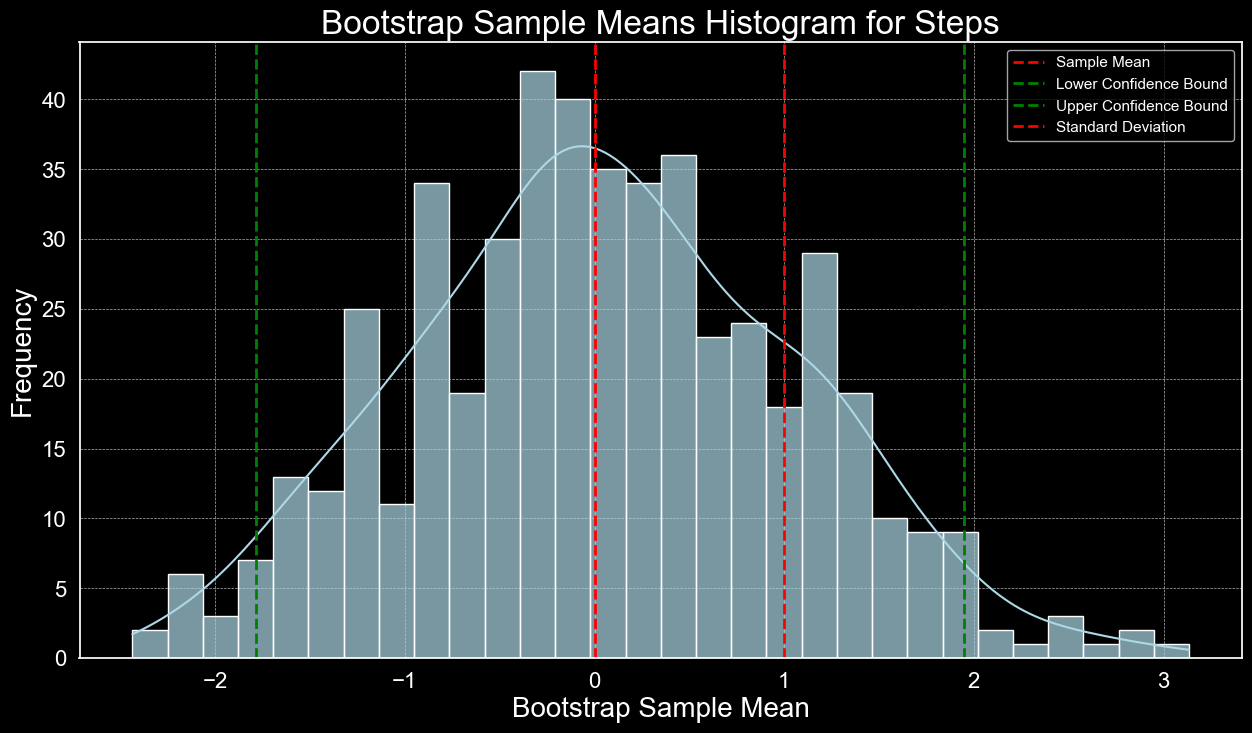

In [616]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('dark_background') 
fig, ax = plt.subplots()
ax.set_facecolor('black')   
ax.xaxis.label.set_color('white')  
ax.yaxis.label.set_color('white') 
ax.title.set_color('white')      
ax.tick_params(axis='x', colors='white') 
ax.tick_params(axis='y', colors='white')  


sns.histplot(New_histo, bins=30, color='lightblue', kde=True, alpha=0.7)
plt.axvline((sample_mean-sample_mean)/std_deviation, color='red', linestyle='dashed', linewidth=2, label='Sample Mean')
plt.axvline((lower_bound-sample_mean)/std_deviation, color='green', linestyle='dashed', linewidth=2, label='Lower Confidence Bound')
plt.axvline((upper_bound-sample_mean)/std_deviation, color='green', linestyle='dashed', linewidth=2, label='Upper Confidence Bound')
plt.axvline(std_deviation/std_deviation, color='red', linestyle='dashed', linewidth=2, label='Standard Deviation')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, color='white')
plt.title("Bootstrap Sample Means Histogram for Steps",fontsize=24)
plt.xlabel("Bootstrap Sample Mean",fontsize=20)
plt.ylabel("Frequency",fontsize=20)
plt.legend()

plt.show()


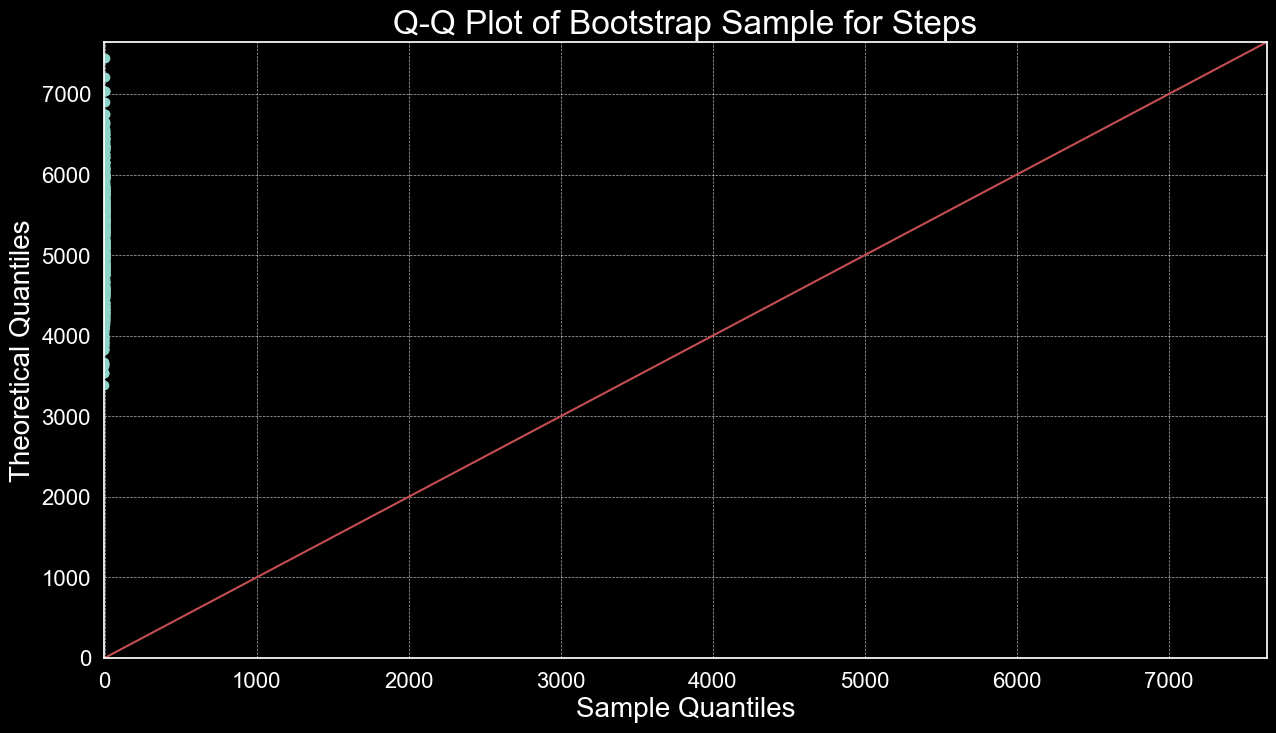

In [617]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

for _ in range(1):
    bootstrap_sample = np.random.choice(bootstrap_means, size=len(bootstrap_means), replace=True)  

    fig, ax = plt.subplots()
    sm.qqplot(bootstrap_sample, line='45', ax=ax)
    
    fig.set_facecolor('black')  
    ax.set_facecolor('black')   
    ax.xaxis.label.set_color('white')  
    ax.yaxis.label.set_color('white')  
    ax.title.set_color('white')        
    ax.tick_params(axis='x', colors='white')  
    ax.tick_params(axis='y', colors='white')
    plt.xlabel("Sample Quantiles",fontsize=20)
    plt.ylabel("Theoretical Quantiles",fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, color='white')

    plt.title("Q-Q Plot of Bootstrap Sample for Steps", color='white', fontsize=24)
    plt.show()


<h3 style="color: Yellow;">After bootstraping the step count it was found on the QQ plot that it doesn't follow a theoretical bell distribution that indicates a departure from the expected distribution.

<h2 style="color: Yellow;">Bootstrapping and QQ plot of step frequency data (500 iterations)

In [618]:
import pandas as pd
import numpy as np

bootstrap_iterations = 500
bootstrap_means = []

for _ in range(bootstrap_iterations):
    bootstrap_sample = merged_df['Step Frequency'].sample(n=len(data), replace=True)
    
    bootstrap_mean = bootstrap_sample.mean()
    bootstrap_means.append(bootstrap_mean)
    
bootstrap_means = np.array(bootstrap_means)

sample_mean = merged_df['Step Frequency'].mean()
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)
std_deviation = np.std(bootstrap_means)
"Sample Mean:", sample_mean
"Lower Confidence Interval:", lower_bound
"Upper Confidence Interval:", upper_bound
"Standard deviation:", std_deviation
New_histo = (bootstrap_means-sample_mean)/std_deviation
New_histo;

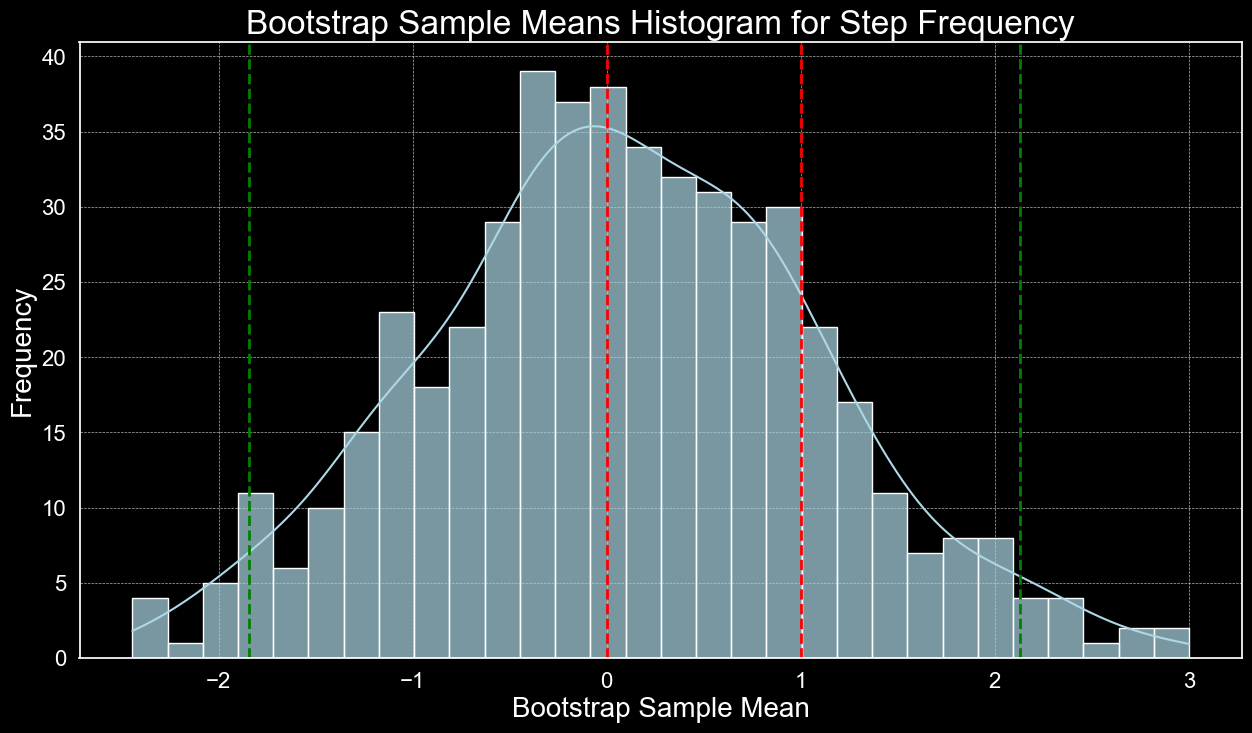

In [619]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('dark_background') 
fig, ax = plt.subplots()
ax.set_facecolor('black')   
ax.xaxis.label.set_color('white')  
ax.yaxis.label.set_color('white') 
ax.title.set_color('white')      
ax.tick_params(axis='x', colors='white') 
ax.tick_params(axis='y', colors='white')  


sns.histplot(New_histo, bins=30, color='lightblue', kde=True, alpha=0.7)
plt.axvline((sample_mean-sample_mean)/std_deviation, color='red', linestyle='dashed', linewidth=2, label='Sample Mean')
plt.axvline((lower_bound-sample_mean)/std_deviation, color='green', linestyle='dashed', linewidth=2, label='Lower Confidence Bound')
plt.axvline((upper_bound-sample_mean)/std_deviation, color='green', linestyle='dashed', linewidth=2, label='Upper Confidence Bound')
plt.axvline(std_deviation/std_deviation, color='red', linestyle='dashed', linewidth=2, label='Standard Deviation')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, color='white')
plt.title("Bootstrap Sample Means Histogram for Step Frequency",fontsize=24)
plt.xlabel("Bootstrap Sample Mean",fontsize=20)
plt.ylabel("Frequency",fontsize=20)

plt.show()


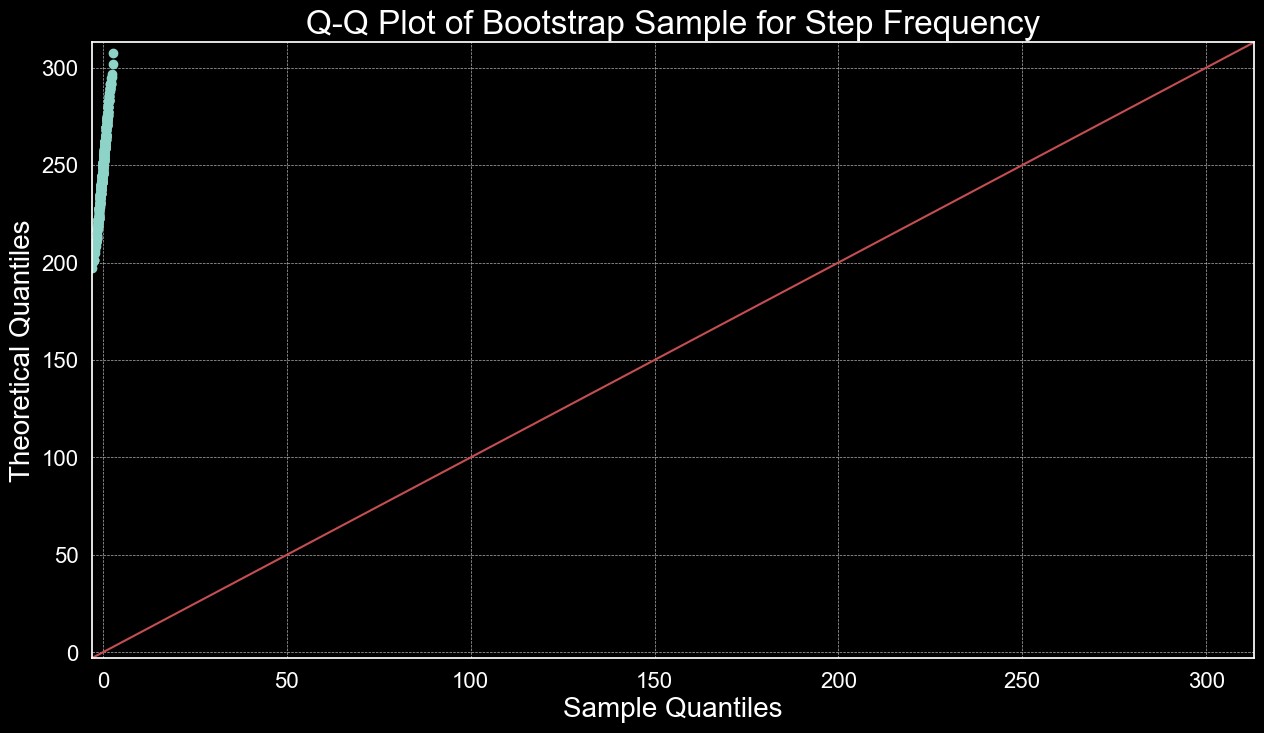

In [620]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

for _ in range(1):
    bootstrap_sample = np.random.choice(bootstrap_means, size=len(bootstrap_means), replace=True)  

    fig, ax = plt.subplots()
    sm.qqplot(bootstrap_sample, line='45', ax=ax)
    
    fig.set_facecolor('black')  
    ax.set_facecolor('black')   
    ax.xaxis.label.set_color('white')  
    ax.yaxis.label.set_color('white')  
    ax.title.set_color('white')        
    ax.tick_params(axis='x', colors='white')  
    ax.tick_params(axis='y', colors='white')  
    plt.xlabel("Sample Quantiles",fontsize=20)
    plt.ylabel("Theoretical Quantiles",fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, color='white')

    plt.title("Q-Q Plot of Bootstrap Sample for Step Frequency", color='white', fontsize=24)
    plt.show()

<h3 style="color: Yellow;">Similar to step count it was found on the QQ plot that step frequency is not following a theoretical bell distribution either, which indicates a departure from the expected distribution.

<h2 style="color: Yellow;">Bootstrapping and QQ plot of sleep quality data (500 iterations)

In [621]:
import pandas as pd
import numpy as np

bootstrap_iterations = 500
bootstrap_means = []

for _ in range(bootstrap_iterations):
    bootstrap_sample = merged_df[' Sleep quality'].sample(n=len(data), replace=True)
    
    bootstrap_mean = bootstrap_sample.mean()
    bootstrap_means.append(bootstrap_mean)
    
bootstrap_means = np.array(bootstrap_means)

sample_mean = merged_df[' Sleep quality'].mean()
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)
std_deviation = np.std(bootstrap_means)
"Sample Mean:", sample_mean
"Lower Confidence Interval:", lower_bound
"Upper Confidence Interval:", upper_bound
"Standard deviation:", std_deviation
New_histo = (bootstrap_means-sample_mean)/std_deviation
New_histo;

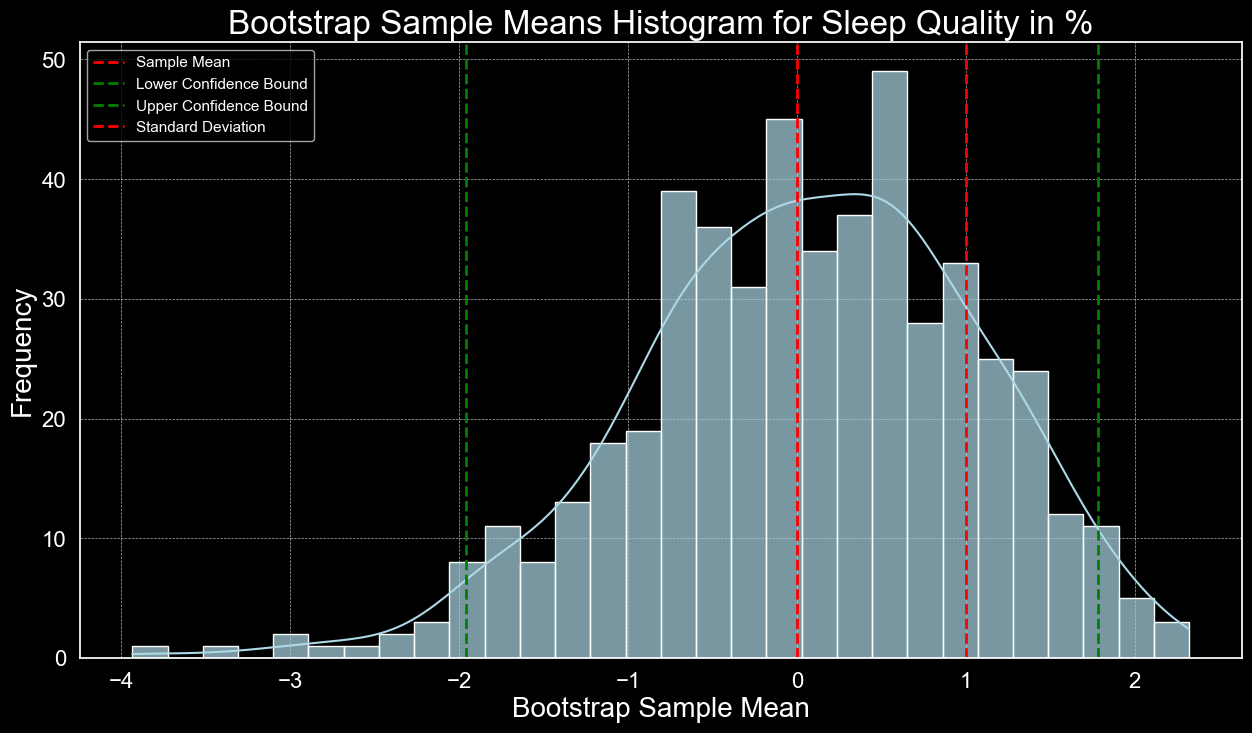

In [622]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(New_histo, bins=30, color='lightblue', kde=True, alpha=0.7)
plt.axvline((sample_mean-sample_mean)/std_deviation, color='red', linestyle='dashed', linewidth=2, label='Sample Mean')
plt.axvline((lower_bound-sample_mean)/std_deviation, color='green', linestyle='dashed', linewidth=2, label='Lower Confidence Bound')
plt.axvline((upper_bound-sample_mean)/std_deviation, color='green', linestyle='dashed', linewidth=2, label='Upper Confidence Bound')
plt.axvline(std_deviation/std_deviation, color='red', linestyle='dashed', linewidth=2, label='Standard Deviation')

fig = plt.gcf()
fig.set_facecolor('black') 
ax = plt.gca()
ax.set_facecolor('black')   
ax.xaxis.label.set_color('white')  
ax.yaxis.label.set_color('white')  
ax.title.set_color('white')        
ax.tick_params(axis='x', colors='white')  
ax.tick_params(axis='y', colors='white') 

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, color='white')
plt.title("Bootstrap Sample Means Histogram for Sleep Quality in %",fontsize=24)
plt.xlabel("Bootstrap Sample Mean",fontsize=20)
plt.ylabel("Frequency",fontsize=20)
plt.legend()

plt.show()


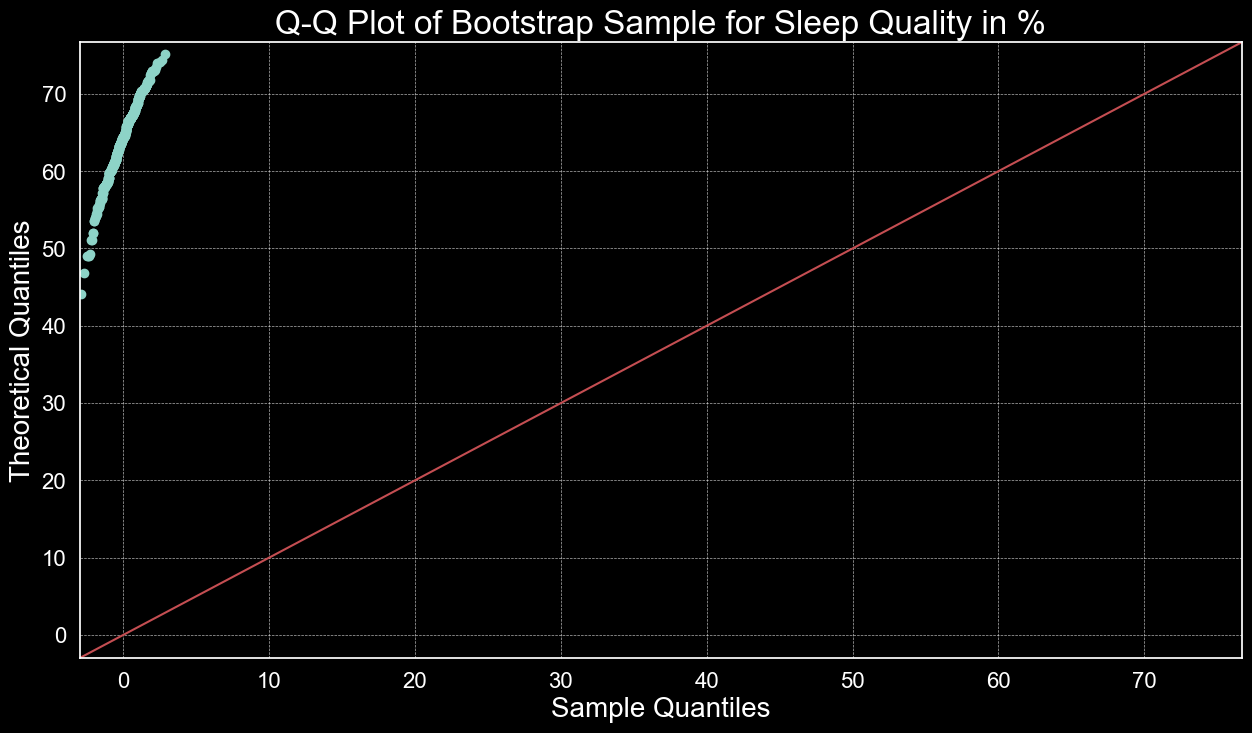

In [623]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

for _ in range(1):
    bootstrap_sample = np.random.choice(bootstrap_means, size=len(bootstrap_means), replace=True)  

    fig, ax = plt.subplots()
    sm.qqplot(bootstrap_sample, line='45', ax=ax)
    
    fig.set_facecolor('black')  
    ax.set_facecolor('black')   
    ax.xaxis.label.set_color('white')  
    ax.yaxis.label.set_color('white')  
    ax.title.set_color('white')        
    ax.tick_params(axis='x', colors='white')  
    ax.tick_params(axis='y', colors='white')  
    plt.xlabel("Sample Quantiles",fontsize=20)
    plt.ylabel("Theoretical Quantiles",fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, color='white')

    plt.title("Q-Q Plot of Bootstrap Sample for Sleep Quality in %", color='white', fontsize=24)
    plt.show()


<h3 style="color: Yellow;">Lastly, on sleep quality, it was found on the QQ plot that the data did not follow a theoretical bell distribution either, which indicates a departure from the expected distribution. However, it is the closest between all three data variables.

<h2 style="color: Yellow;">Predictions on sleep time based on Steps and Step frequency
<h3 style="color: Yellow;">Based on the acquired data it is possible to give theoretical predictions on the total sleep time based on the total steps of the day and step frequency of the day. Down below, examples are given with different settings to give context. 

In [624]:
import pandas as pd
import numpy as np

# data
merged_df

# Number of bootstrap iterations
num_iterations = 50

# Perform bootstrap iterations
bootstrap_samples = []
for _ in range(num_iterations):
    # Sample with replacement
    bootstrap_sample = np.random.choice(merged_df['Steps'], size=len(merged_df), replace=True)
    bootstrap_samples.append(bootstrap_sample)

bootstrap_array = np.array(bootstrap_samples)
df_steps=pd.DataFrame({'Steps':bootstrap_array.flatten()})
df_steps['Count'] = range(1, 601)
df_steps;

In [625]:
import pandas as pd
import numpy as np

# data
merged_df

# Number of bootstrap iterations
num_iterations = 50

# Perform bootstrap iterations
bootstrap_samples = []
for _ in range(num_iterations):
    # Sample with replacement
    bootstrap_sample = np.random.choice(merged_df['Step Frequency'], size=len(merged_df), replace=True)
    bootstrap_samples.append(bootstrap_sample)

bootstrap_array = np.array(bootstrap_samples)
df_step_frequency=pd.DataFrame({'Step Frequency':bootstrap_array.flatten()})
df_step_frequency['Count'] = range(1, 601)
df_step_frequency;

In [626]:
import pandas as pd
import numpy as np

# data
merged_df

# Number of bootstrap iterations
num_iterations = 50

# Perform bootstrap iterations
bootstrap_samples = []
for _ in range(num_iterations):
    # Sample with replacement
    bootstrap_sample = np.random.choice(merged_df[' Time in Bed (mins)'], size=len(merged_df), replace=True)
    bootstrap_samples.append(bootstrap_sample)

bootstrap_array = np.array(bootstrap_samples)
df_Sleep_time=pd.DataFrame({' Time in Bed (mins)':bootstrap_array.flatten()})
df_Sleep_time[' Time in Bed (hours)'] = df_Sleep_time[' Time in Bed (mins)']/60
df_Sleep_time['Count'] = range(1, 601)
df_Sleep_time;

In [627]:
import pandas as pd
import numpy as np

# data
merged_df

# Number of bootstrap iterations
num_iterations = 50

# Perform bootstrap iterations
bootstrap_samples = []
for _ in range(num_iterations):
    # Sample with replacement
    bootstrap_sample = np.random.choice(merged_df[' Sleep quality'], size=len(merged_df), replace=True)
    bootstrap_samples.append(bootstrap_sample)

bootstrap_array = np.array(bootstrap_samples)
df_Sleep_quality=pd.DataFrame({' Sleep quality':bootstrap_array.flatten()})
df_Sleep_quality['Count'] = range(1, 601)
df_Sleep_quality;

In [628]:
Bootstrap_df = pd.merge(df_steps, df_step_frequency, on='Count')
Bootstrap_df  = pd.merge(Bootstrap_df, df_Sleep_quality, on='Count')
Bootstrap_df  = pd.merge(Bootstrap_df, df_Sleep_time, on='Count')
Bootstrap_df;

In [629]:
from sklearn.linear_model import LinearRegression

x = merged_df[['Steps','Step Frequency']]
y = merged_df[' Time in Bed (mins)']

model = LinearRegression()
model.fit(x, y);


<h2 style="color: Yellow;">After going through the data and bootstraping it, it can be possible to make linear predictions with the data. Some examples of this are as follows.
<h3 style="color: Yellow;">Prediction of sleep time with 4500 Steps and Step frequency of 180 with intercept and coefficients

In [630]:
from sklearn.linear_model import LinearRegression
from IPython.display import HTML

output_text = "This is the output text in yellow."
styled_output = f"<font color='yellow'>{output_text}</font>"

HTML(styled_output)

# define response and explanatory values
x = merged_df[['Steps','Step Frequency']]
y = merged_df[' Time in Bed (mins)']

# with sklearn
sleep_linreg = LinearRegression()
sleep_linreg.fit(x.values, y.values)

output_text = 'Intercept: \n', sleep_linreg.intercept_
styled_output = f"<font color='yellow'>{output_text}</14>"
output_text = 'Coefficients: \n', sleep_linreg.coef_
styled_output1 = f"<font color='yellow'>{output_text}</14>"


# Tahmin yapmak için örnek verileri kullanın
new_data = pd.DataFrame({'Steps': [4500], 'Step Frequency': [180]})
predicted_sleep_time = model.predict(new_data)

# Tahmin sonuçlarını ekrana yazdırın
output_text = "Predicted sleep time (minutes):", predicted_sleep_time[0]
styled_output2 = f"<font color='yellow'>{output_text}</14>"

HTML(styled_output)


In [631]:
HTML(styled_output1)

In [632]:
HTML(styled_output2)

<h3 style="color: Yellow;">Prediction of sleep time with 4500 Steps and Step frequency of 300

In [633]:
new_data = pd.DataFrame({'Steps': [4500], 'Step Frequency': [300]})
predicted_sleep_time = model.predict(new_data)
output_text = "Predicted sleep time (minutes):", predicted_sleep_time[0]
styled_output3 = f"<font color='yellow'>{output_text}</14>"

HTML(styled_output3)

<h3 style="color: Yellow;">Prediction of sleep time with 4500 Steps and Step frequency of 180

In [634]:
new_data = pd.DataFrame({'Steps': [4500], 'Step Frequency': [180]})
predicted_sleep_time = model.predict(new_data)
output_text = "Predicted sleep time (minutes):", predicted_sleep_time[0]
styled_output4 = f"<font color='yellow'>{output_text}</14>"

HTML(styled_output4)


<h3 style="color: Yellow;">Prediction of sleep time with 1000 Steps and Step frequency of 300

In [635]:
new_data = pd.DataFrame({'Steps': [1000], 'Step Frequency': [300]})
predicted_sleep_time = model.predict(new_data)
output_text = "Predicted sleep time (minutes):", predicted_sleep_time[0]
styled_output5 = f"<font color='yellow'>{output_text}</14>"

HTML(styled_output5)

<h3 style="color: Yellow;">Prediction of sleep time with 1000 Steps and Step frequency of 180

In [636]:
new_data = pd.DataFrame({'Steps': [1000], 'Step Frequency': [180]})
predicted_sleep_time = model.predict(new_data)
output_text = "Predicted sleep time (minutes):", predicted_sleep_time[0]
styled_output6 = f"<font color='yellow'>{output_text}</14>"

HTML(styled_output6)


<h2 style="color: Yellow;">It is also possible to graph the data into a Linear Regression Predicition. This is done illustrate an estamete sleep time and sleep quality of the model in a linear model. 

C:\Users\princ\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


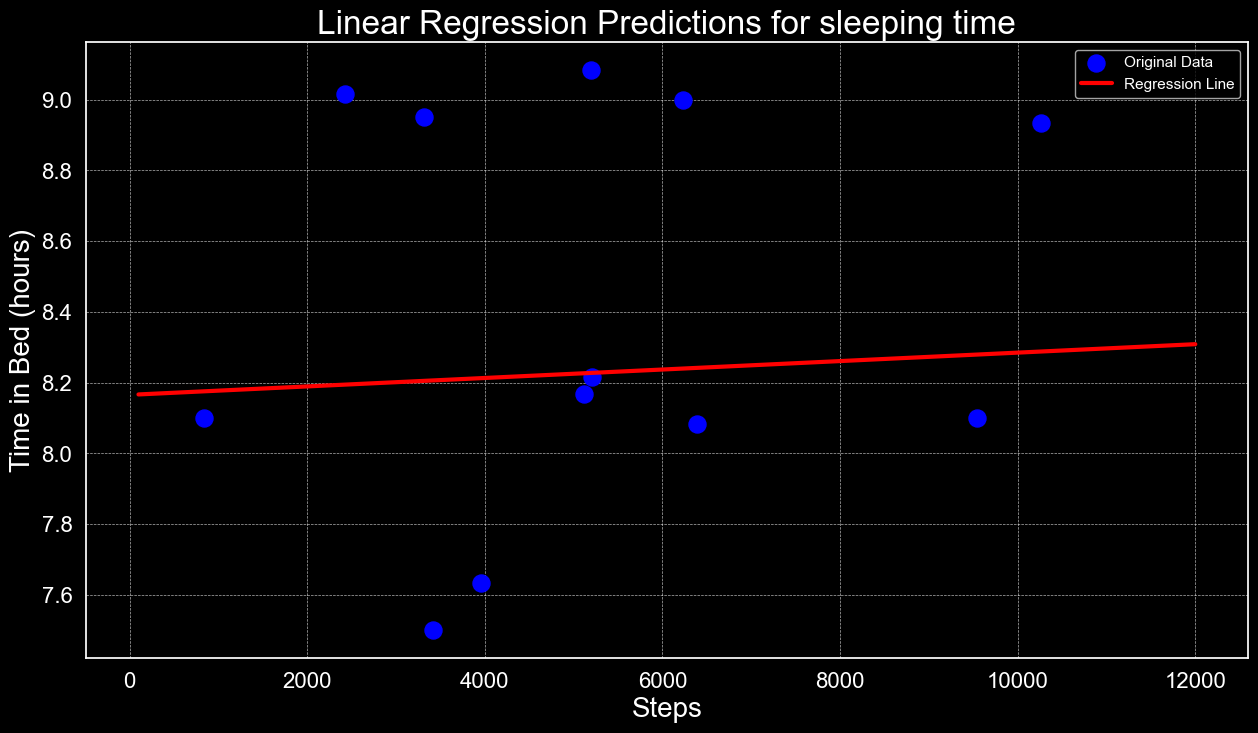

In [642]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from IPython.display import HTML

# define response and explanatory values
x = merged_df[['Steps', 'Step Frequency']]
y = merged_df[' Time in Bed(hours)']

# Train the linear regression model
sleep_linreg = LinearRegression()
sleep_linreg.fit(x.values, y.values)

# Predictions
new_data = pd.DataFrame({'Steps': [4500], 'Step Frequency': [300]})
predicted_sleep_time = sleep_linreg.predict(new_data)

# Visualize the results
fig, ax = plt.subplots()

# Scatter plot of original data
ax.scatter(merged_df['Steps'], merged_df[' Time in Bed(hours)'], color='blue', label='Original Data',s=150)

# Plot the regression line
x_line = np.linspace(100, 12000, 100)
y_line = sleep_linreg.predict(np.column_stack((x_line, np.full_like(x_line, 180))))
ax.plot(x_line, y_line, color='red', label='Regression Line',linewidth=3)

# Highlight the predicted point
#ax.scatter(new_data['Steps'], predicted_sleep_time, color='green', label='Predicted Point', marker='x',s=300)

# Labeling
ax.set_xlabel('Steps', fontsize=20)
ax.set_ylabel('Time in Bed (hours)',fontsize=20)
ax.set_title('Linear Regression Predictions for sleeping time', fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, color='white')

# Add a legend
ax.legend()

# Show the plot
plt.show()


C:\Users\princ\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


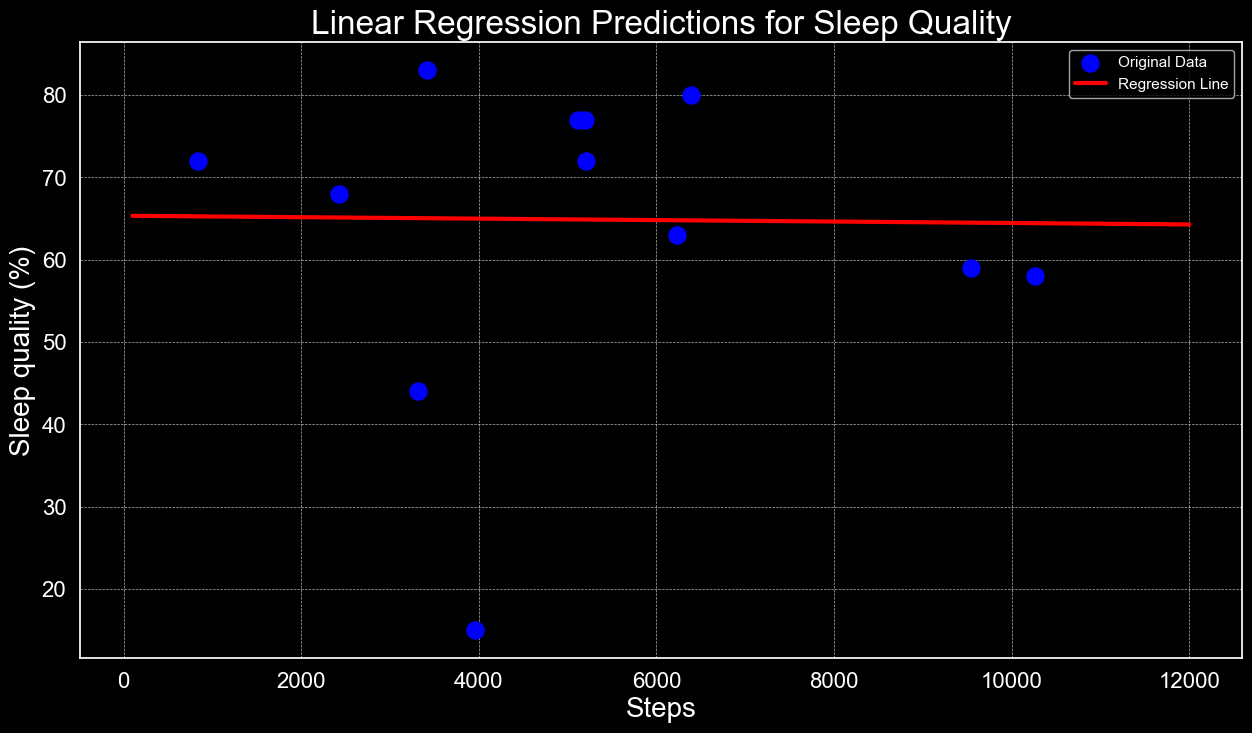

In [643]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from IPython.display import HTML

# define response and explanatory values
x = merged_df[['Steps', 'Step Frequency']]
y = merged_df[' Sleep quality']

# Train the linear regression model
sleep_linreg = LinearRegression()
sleep_linreg.fit(x.values, y.values)

# Predictions
new_data = pd.DataFrame({'Steps': [4500], 'Step Frequency': [450]})
predicted_sleep_time = sleep_linreg.predict(new_data)

# Visualize the results
fig, ax = plt.subplots()

# Scatter plot of original data
ax.scatter(merged_df['Steps'], merged_df[' Sleep quality'], color='blue', label='Original Data',s=150)

# Plot the regression line
x_line = np.linspace(100, 12000, 100)
y_line = sleep_linreg.predict(np.column_stack((x_line, np.full_like(x_line, 180))))
ax.plot(x_line, y_line, color='red', label='Regression Line',linewidth=3)

# Highlight the predicted point
#ax.scatter(new_data['Steps'], predicted_sleep_time, color='green', label='Predicted Point', marker='x',s=300)

# Labeling
ax.set_xlabel('Steps', fontsize=20)
ax.set_ylabel('Sleep quality (%)',fontsize=20)
ax.set_title('Linear Regression Predictions for Sleep Quality', fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, color='white')

# Add a legend
ax.legend()

# Show the plot
plt.show()

<h2 style="color: Yellow;">Another itteration of this is using bootstrap data to graph it, however due to limited samples, this example may be incorrect and more data samples may be required to give a prover representation. However the Sleep Quality has shown be improved a bit.

C:\Users\princ\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


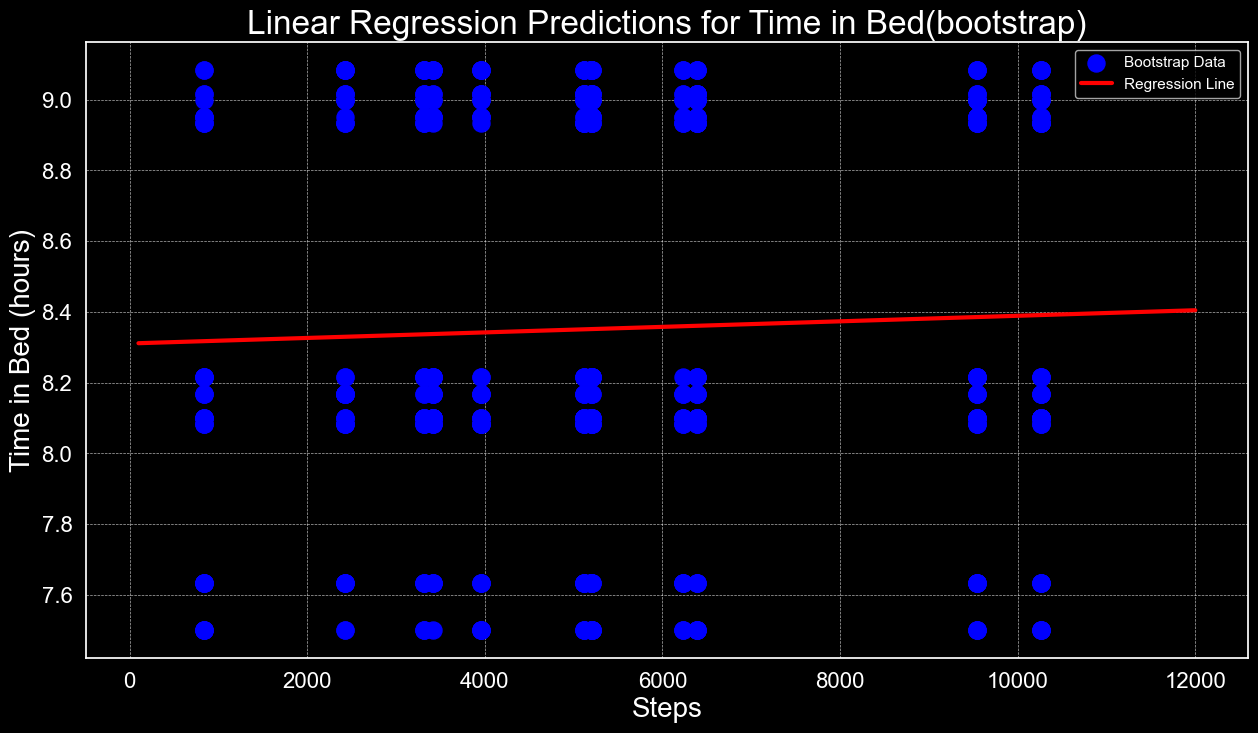

In [639]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from IPython.display import HTML

# define response and explanatory values
x = Bootstrap_df[['Steps', 'Step Frequency']]
y = Bootstrap_df[' Time in Bed (hours)']

# Train the linear regression model
sleep_linreg = LinearRegression()
sleep_linreg.fit(x.values, y.values)

# Predictions
new_data = pd.DataFrame({'Steps': [4500], 'Step Frequency': [300]})
predicted_sleep_time = sleep_linreg.predict(new_data)

# Visualize the results
fig, ax = plt.subplots()

# Scatter plot of original data
ax.scatter(Bootstrap_df['Steps'], Bootstrap_df[' Time in Bed (hours)'], color='blue', label='Bootstrap Data',s=150)

# Plot the regression line
x_line = np.linspace(100, 12000, 100)
y_line = sleep_linreg.predict(np.column_stack((x_line, np.full_like(x_line, 180))))
ax.plot(x_line, y_line, color='red', label='Regression Line',linewidth=3)

# Highlight the predicted point
#ax.scatter(new_data['Steps'], predicted_sleep_time, color='green', label='Predicted Point', marker='x',s=300)

# Labeling
ax.set_xlabel('Steps', fontsize=20)
ax.set_ylabel('Time in Bed (hours)',fontsize=20)
ax.set_title('Linear Regression Predictions for Time in Bed(bootstrap)', fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, color='white')

# Add a legend
ax.legend()

# Show the plot
plt.show()

C:\Users\princ\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


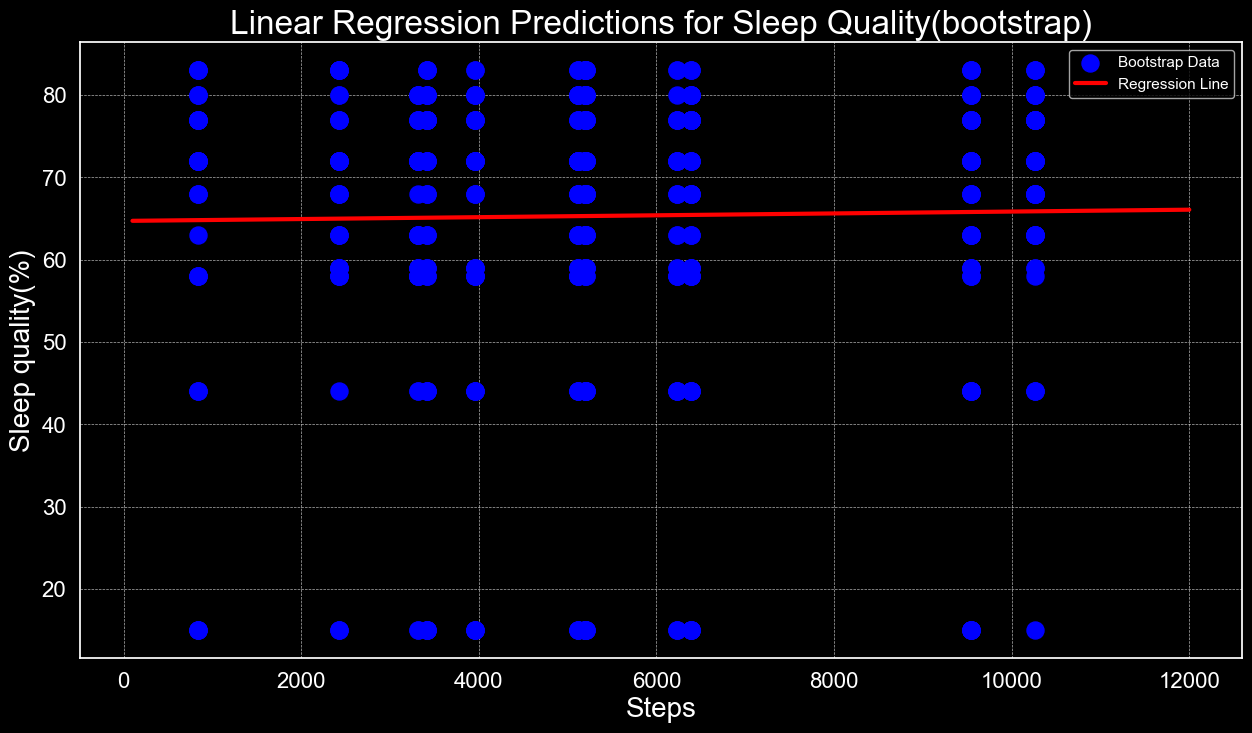

In [640]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from IPython.display import HTML

# define response and explanatory values
x = Bootstrap_df[['Steps', 'Step Frequency']]
y = Bootstrap_df[' Sleep quality']

# Train the linear regression model
sleep_linreg = LinearRegression()
sleep_linreg.fit(x.values, y.values)

# Predictions
new_data = pd.DataFrame({'Steps': [4500], 'Step Frequency': [300]})
predicted_sleep_time = sleep_linreg.predict(new_data)

# Visualize the results
fig, ax = plt.subplots()

# Scatter plot of original data
ax.scatter(Bootstrap_df['Steps'], Bootstrap_df[' Sleep quality'], color='blue', label='Bootstrap Data',s=150)

# Plot the regression line
x_line = np.linspace(100, 12000, 100)
y_line = sleep_linreg.predict(np.column_stack((x_line, np.full_like(x_line, 180))))
ax.plot(x_line, y_line, color='red', label='Regression Line',linewidth=3)

# Highlight the predicted point
#ax.scatter(new_data['Steps'], predicted_sleep_time, color='green', label='Predicted Point', marker='x',s=300)

# Labeling
ax.set_xlabel('Steps', fontsize=20)
ax.set_ylabel('Sleep quality(%)',fontsize=20)
ax.set_title('Linear Regression Predictions for Sleep Quality(bootstrap)', fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, color='white')

# Add a legend
ax.legend()

# Show the plot
plt.show()

<h1 style="color: Yellow;">To conclude activity in steps does show a slight possitive correlation in sleep quality while a slight negative correlation in Time in Bed. It should also be aknowledged that these data point may have extreme variation and should be looked at as a point of understanding and not predicting or changing behaviour.

In [556]:
!jupyter nbconvert --to html --no-input Challenge1Code.ipynb

[NbConvertApp] Converting notebook Challenge1Code.ipynb to html
[NbConvertApp] Writing 3493603 bytes to Challenge1Code.html
